OS in my system :  linux

Duomenų rinkinys:  /home/kesju/DI/DUOM_2022_RUDUO_2
Vaizduojamas fragmentas: 0 None
['1633428.560']

Zive įrašas:  1633428.560
signal_length=  127999 (127999,)
Lango plotis:  2000 Langų:  63

Anotacijų įraše (F ir U ignoruojamos):
{'N': 1035, 'S': 85}

df_rpeaks:

Rankinės anotacijos S: {2682: 'S', 3196: 'S', 7881: 'S', 11300: 'S', 12309: 'S', 17467: 'S', 18007: 'S', 20548: 'S', 21755: 'S', 22339: 'S', 23453: 'S', 24141: 'S', 24479: 'S', 24697: 'S', 26367: 'S', 27477: 'S', 29065: 'S', 33691: 'S', 35801: 'S', 36592: 'S', 37386: 'S', 38465: 'S', 40862: 'S', 41177: 'S', 41987: 'S', 42817: 'S', 43158: 'S', 43679: 'S', 44669: 'S', 45322: 'S', 46247: 'S', 47019: 'S', 47783: 'S', 48557: 'S', 49074: 'S', 50469: 'S', 53458: 'S', 53995: 'S', 54297: 'S', 58331: 'S', 59157: 'S', 59919: 'S', 60152: 'S', 60360: 'S', 60784: 'S', 61769: 'S', 62153: 'S', 63554: 'S', 66435: 'S', 69436: 'S', 69906: 'S', 70831: 'S', 77089: 'S', 78413: 'S', 83551: 'S', 83771: 'S', 84632: 'S', 8494

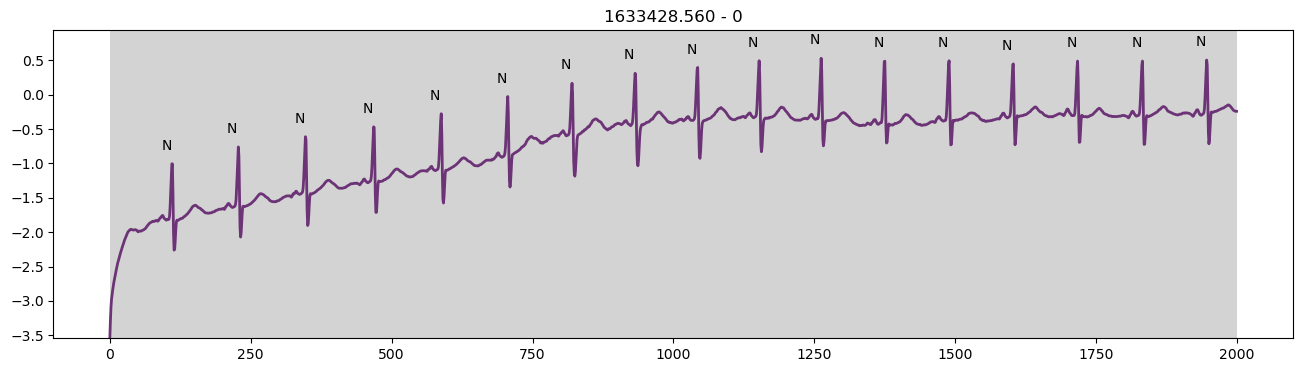

frag_nr = 1 2000 4000


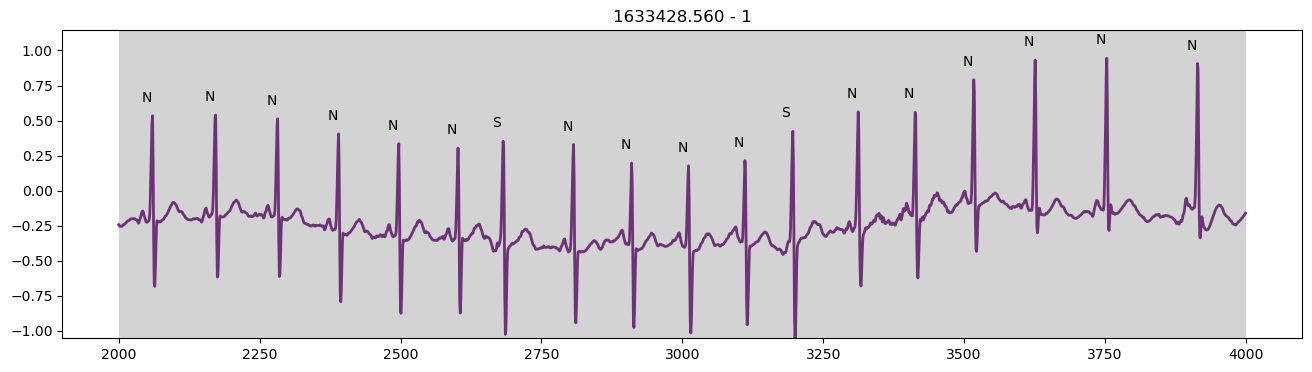

frag_nr = 2 4000 6000


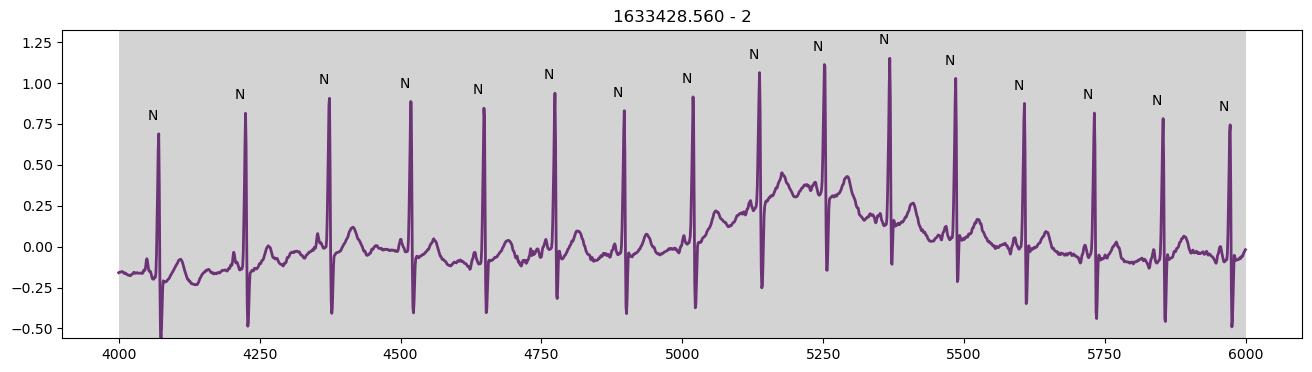

frag_nr = 3 6000 8000


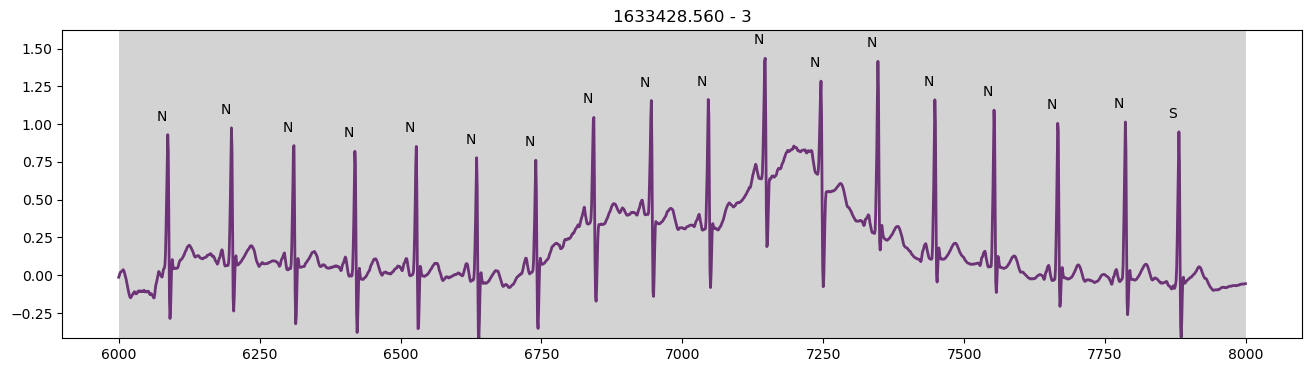

frag_nr = 4 8000 10000


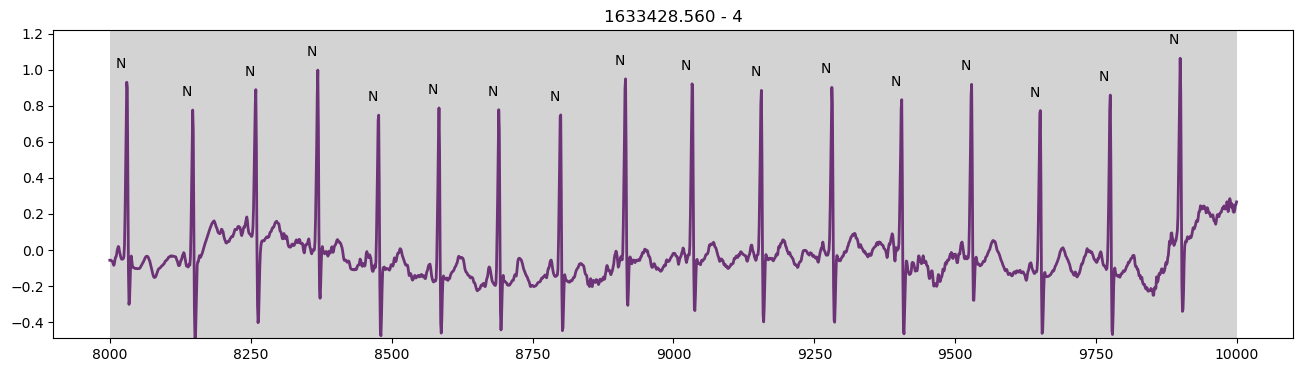

frag_nr = 5 10000 12000


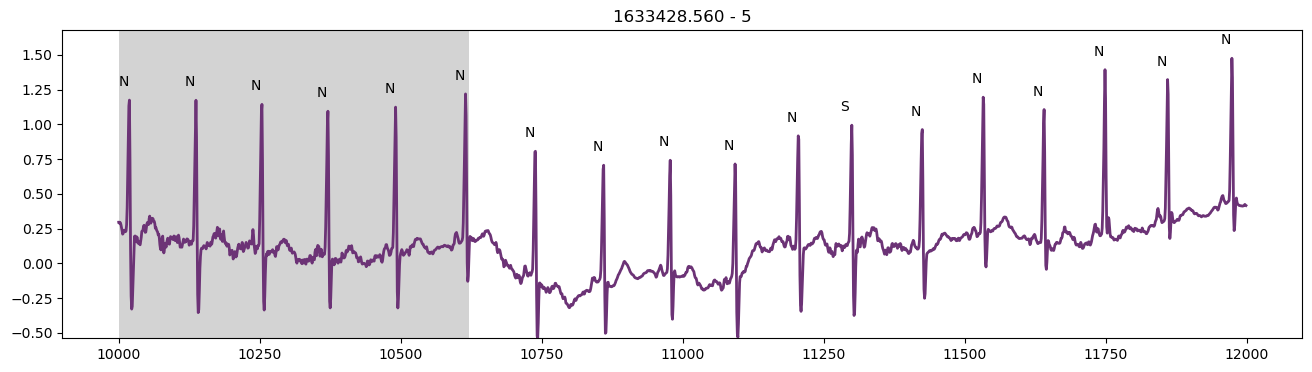

frag_nr = 6 12000 14000


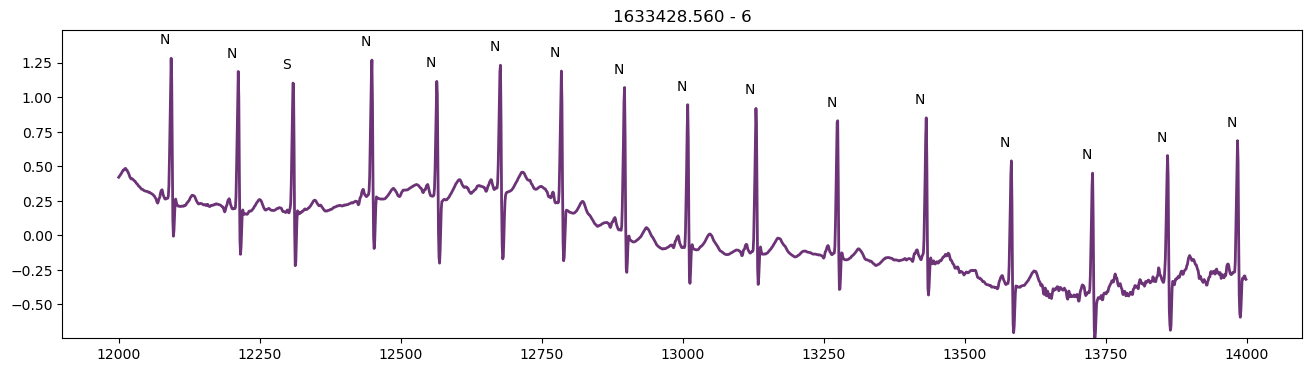

frag_nr = 7 14000 16000


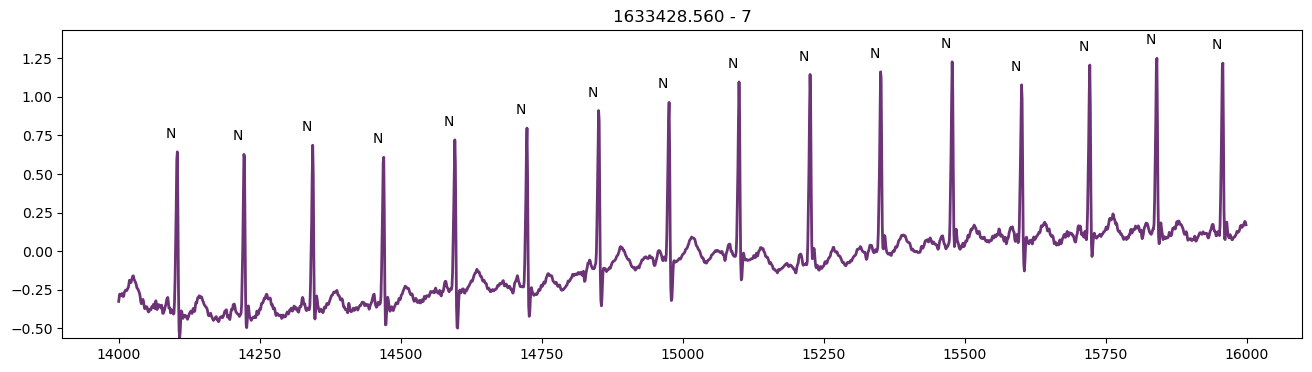

frag_nr = 8 16000 18000


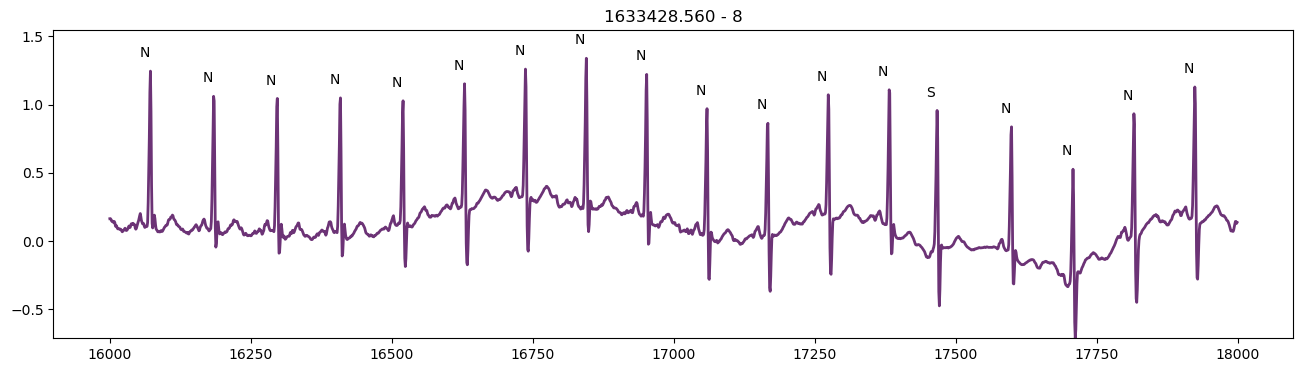

frag_nr = 9 18000 20000


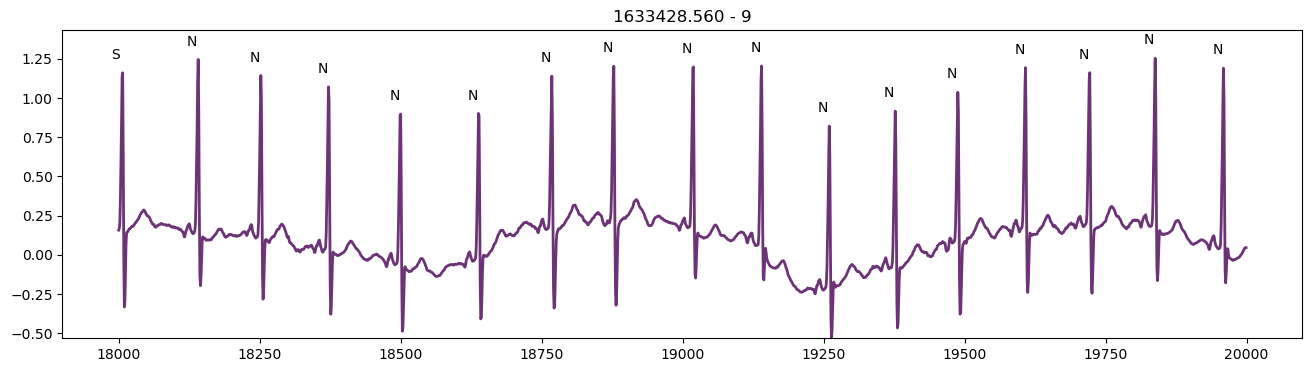

frag_nr = 10 20000 22000


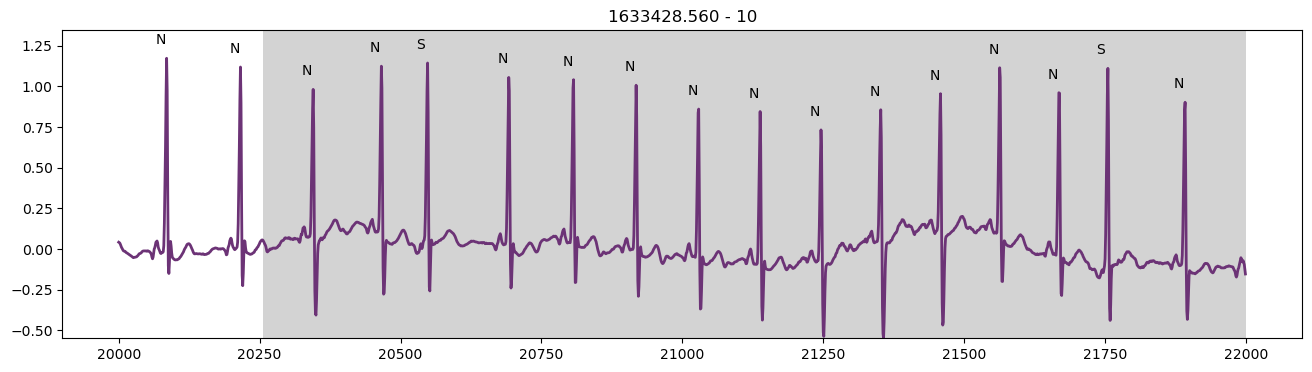

frag_nr = 11 22000 24000


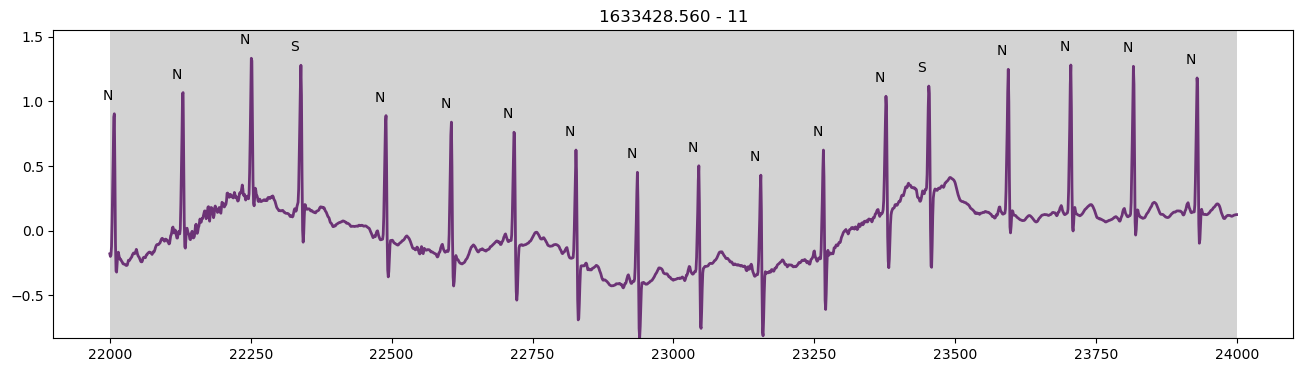

frag_nr = 12 24000 26000


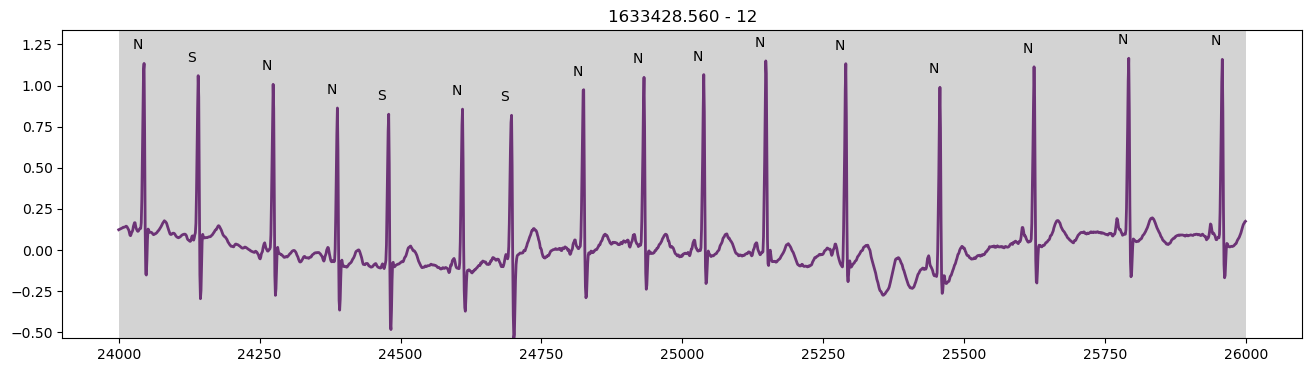

frag_nr = 13 26000 28000


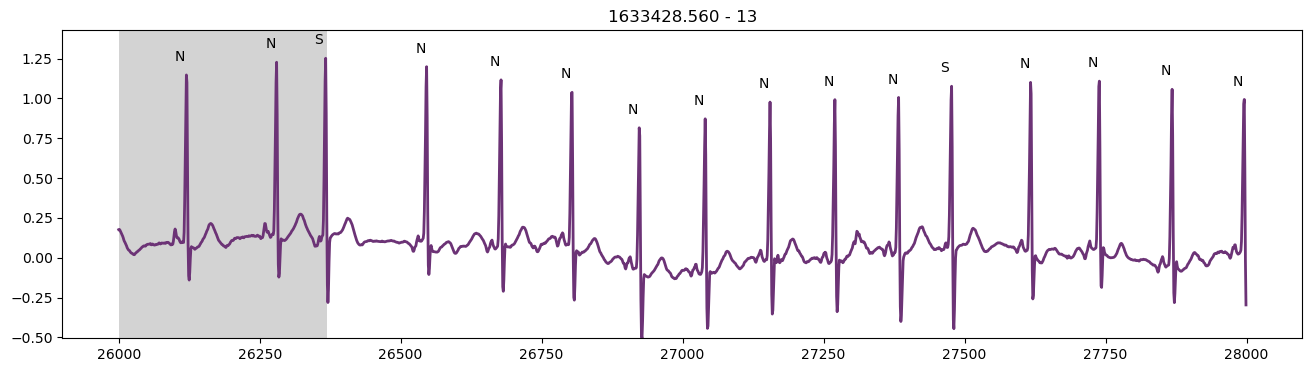

frag_nr = 14 28000 30000


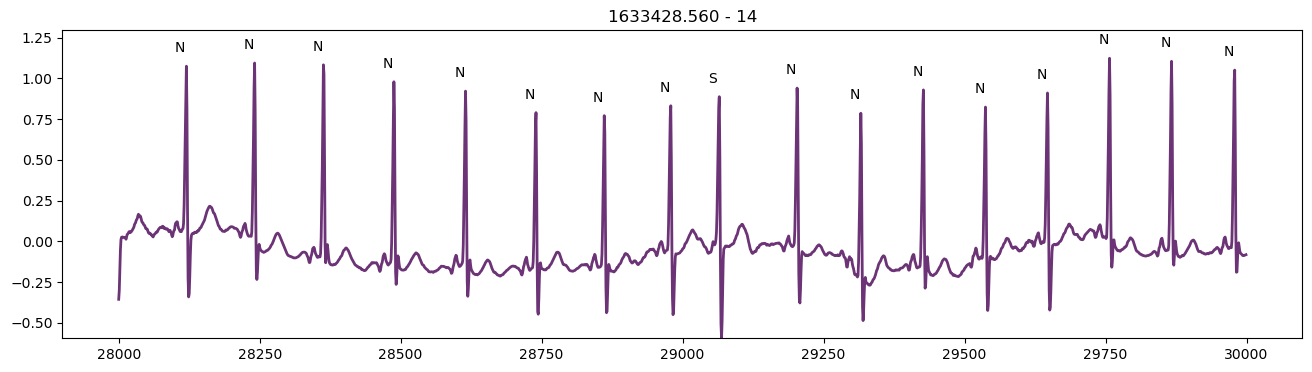

frag_nr = 15 30000 32000


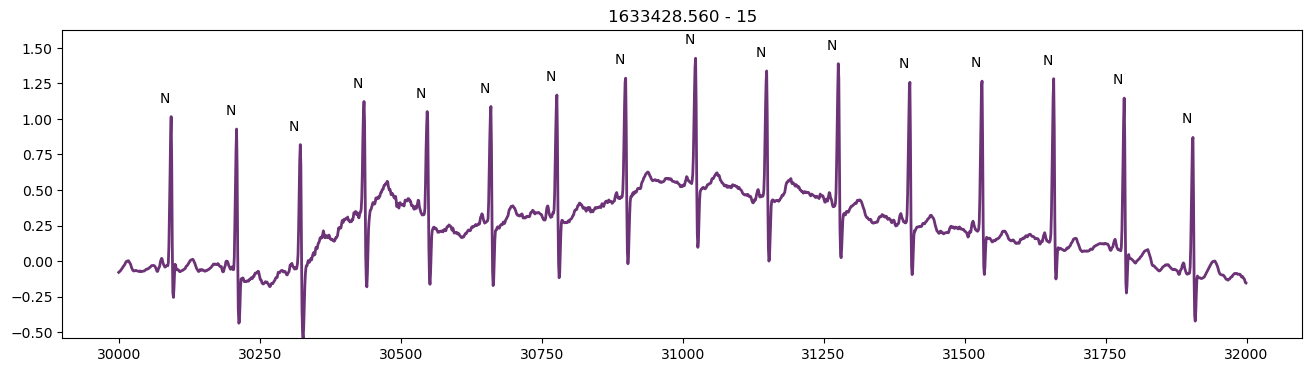

frag_nr = 16 32000 34000


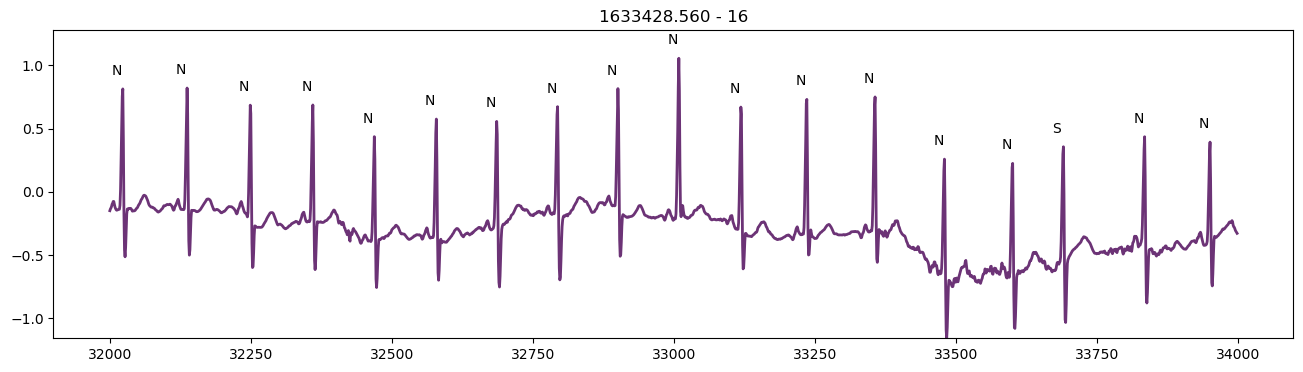

frag_nr = 17 34000 36000


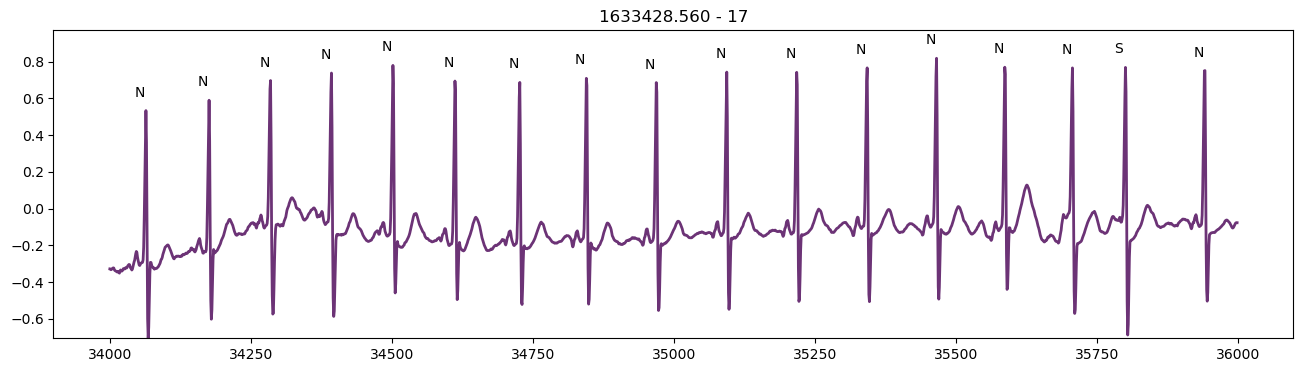

frag_nr = 18 36000 38000


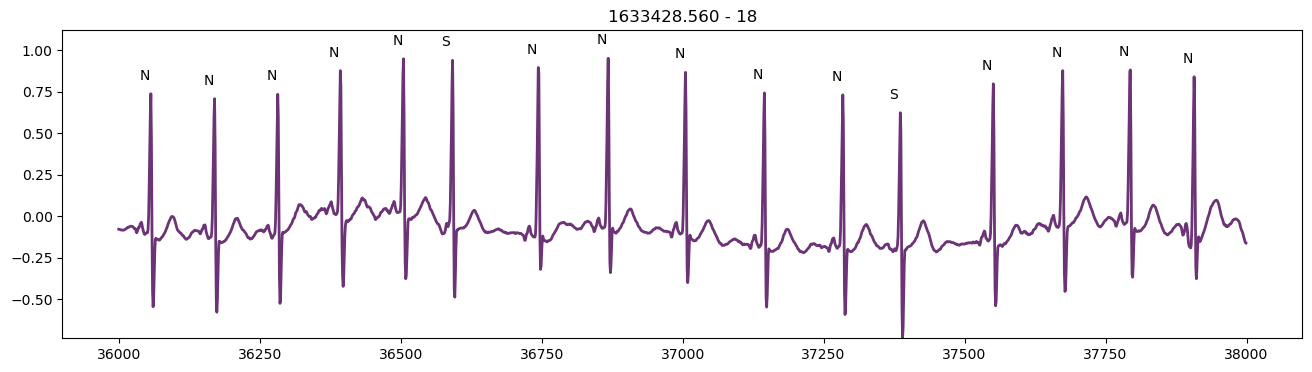

frag_nr = 19 38000 40000


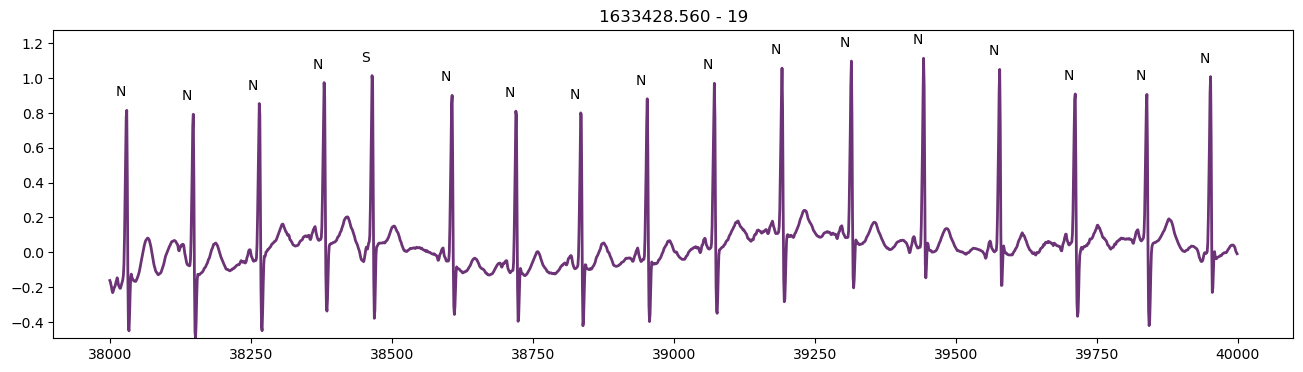

frag_nr = 20 40000 42000


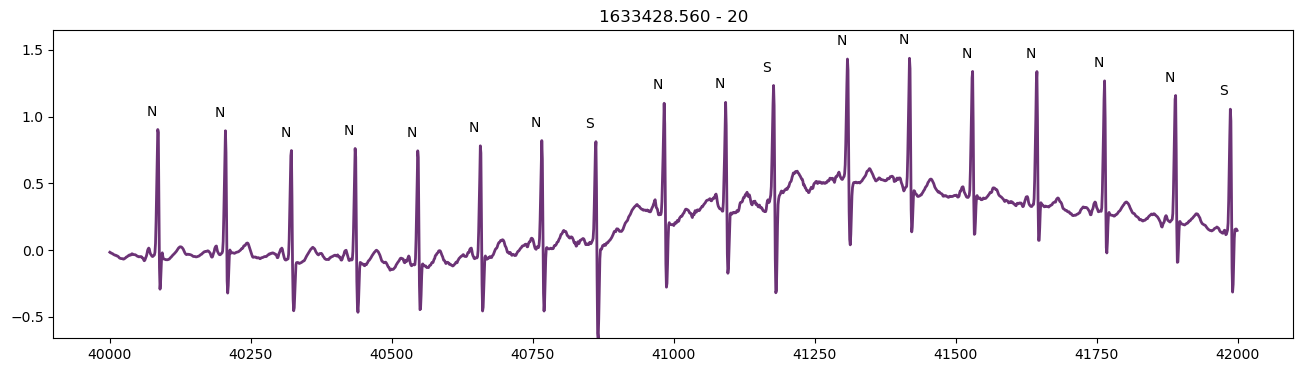

frag_nr = 21 42000 44000


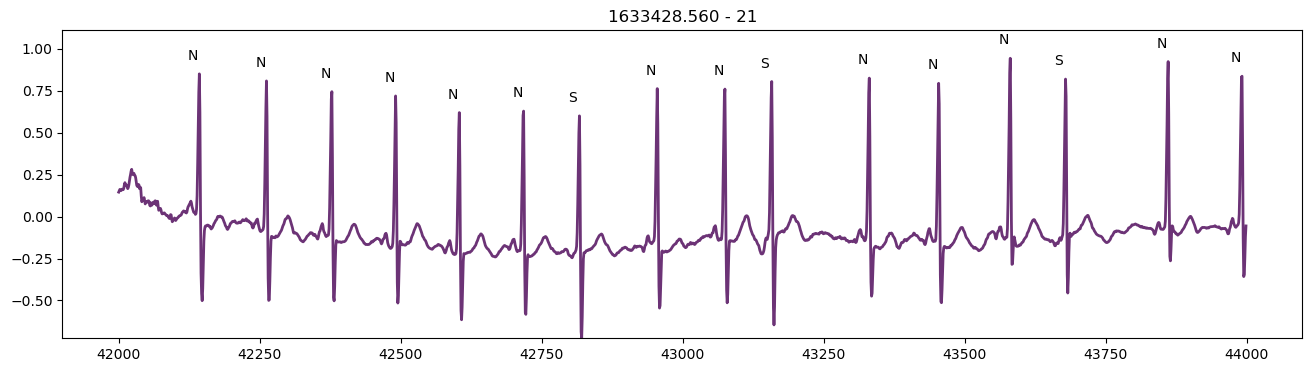

frag_nr = 22 44000 46000


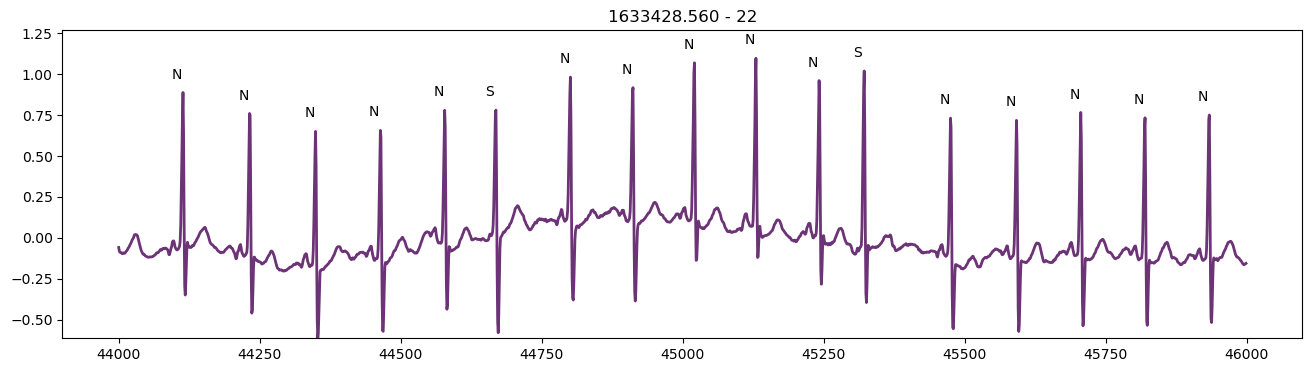

frag_nr = 23 46000 48000


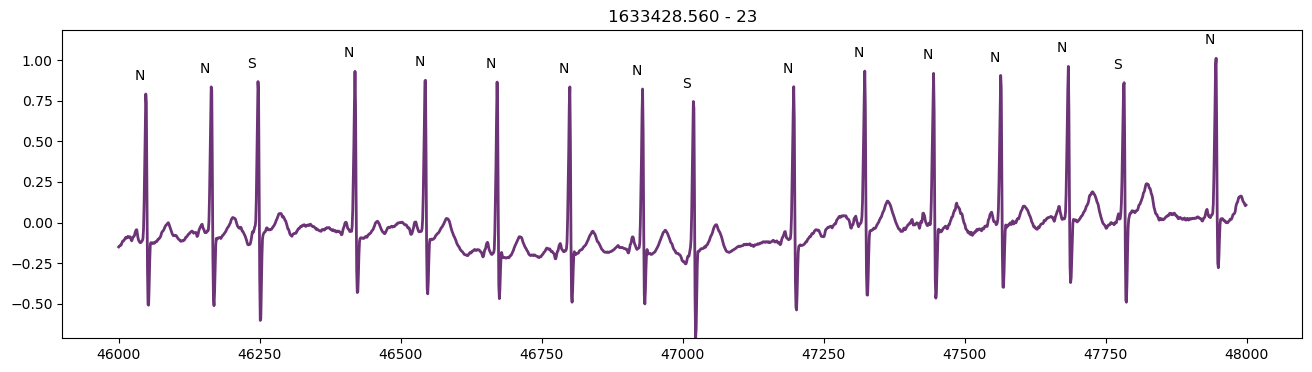

frag_nr = 24 48000 50000


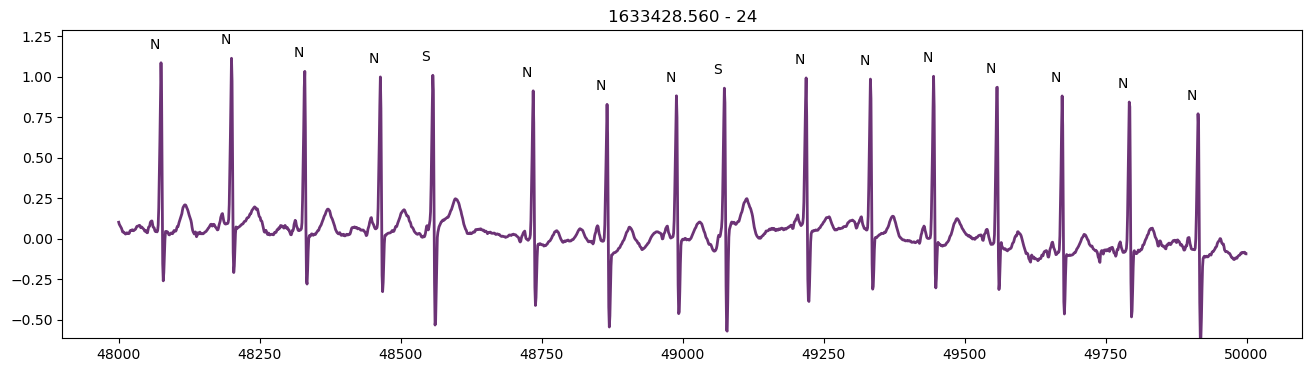

frag_nr = 25 50000 52000


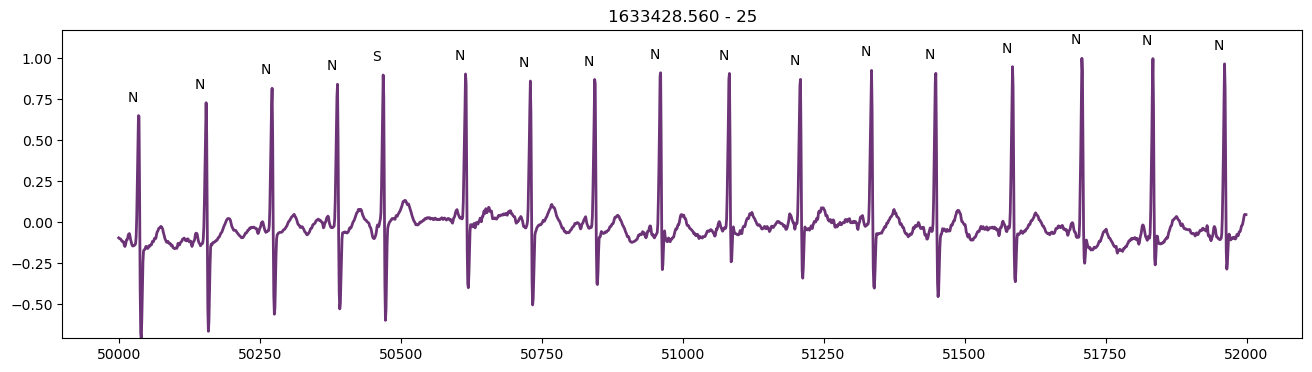

frag_nr = 26 52000 54000


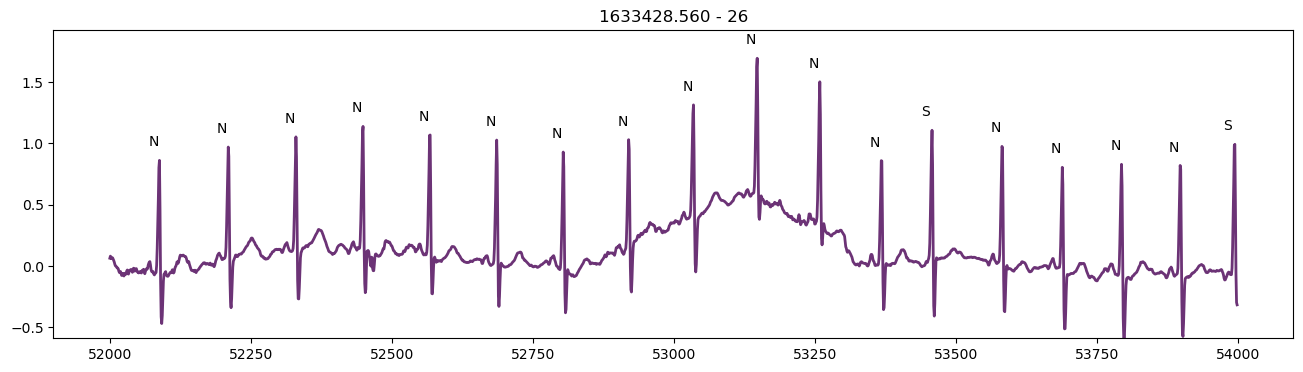

frag_nr = 27 54000 56000


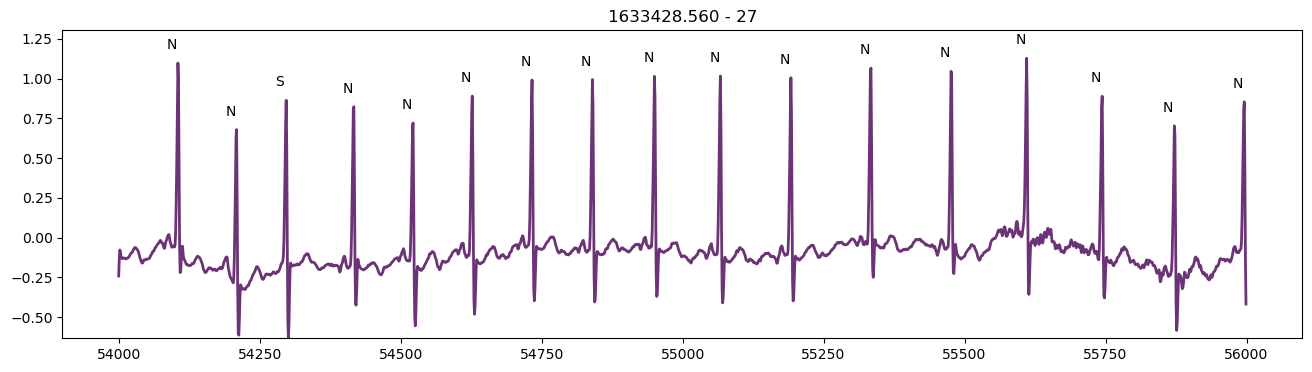

frag_nr = 28 56000 58000


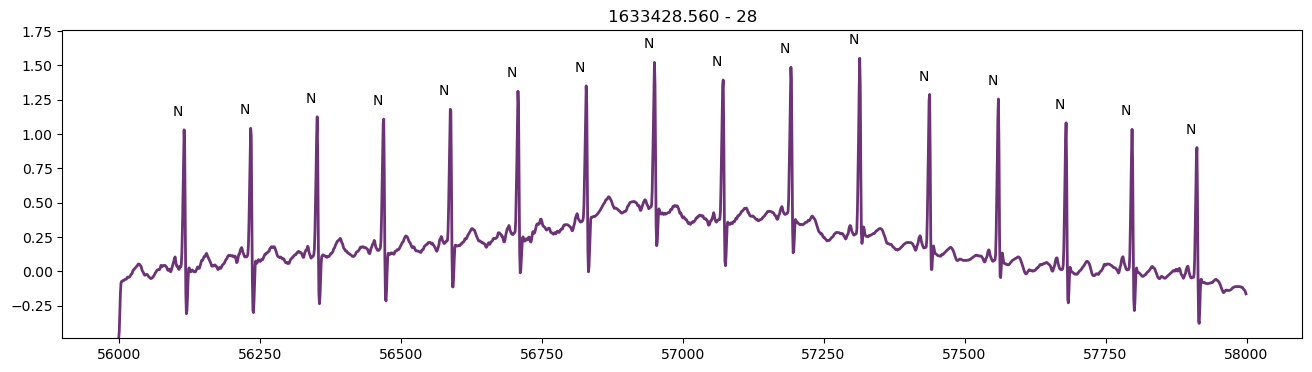

frag_nr = 29 58000 60000


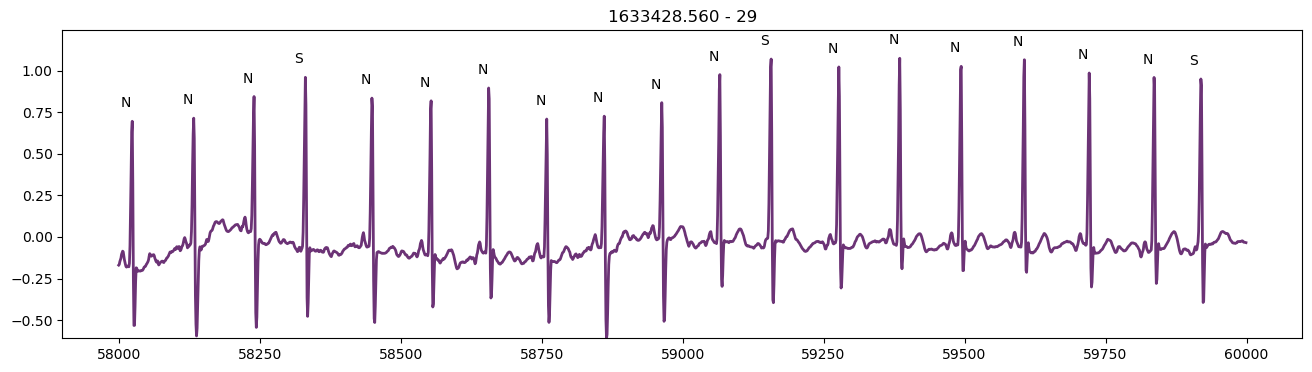

frag_nr = 30 60000 62000


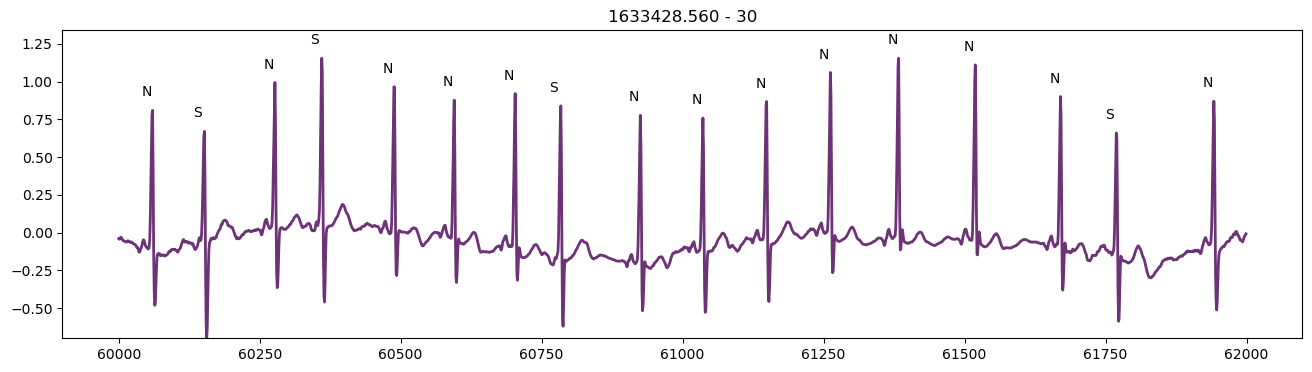

frag_nr = 31 62000 64000


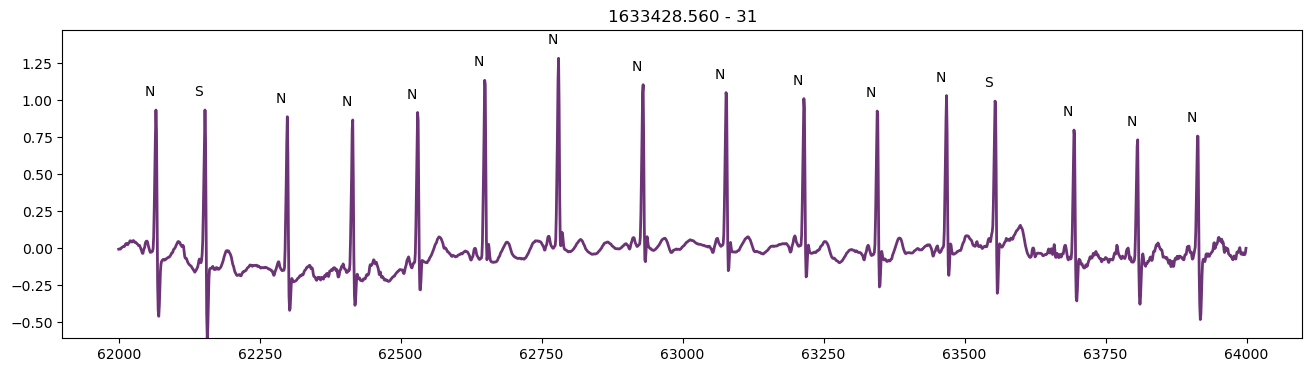

frag_nr = 32 64000 66000


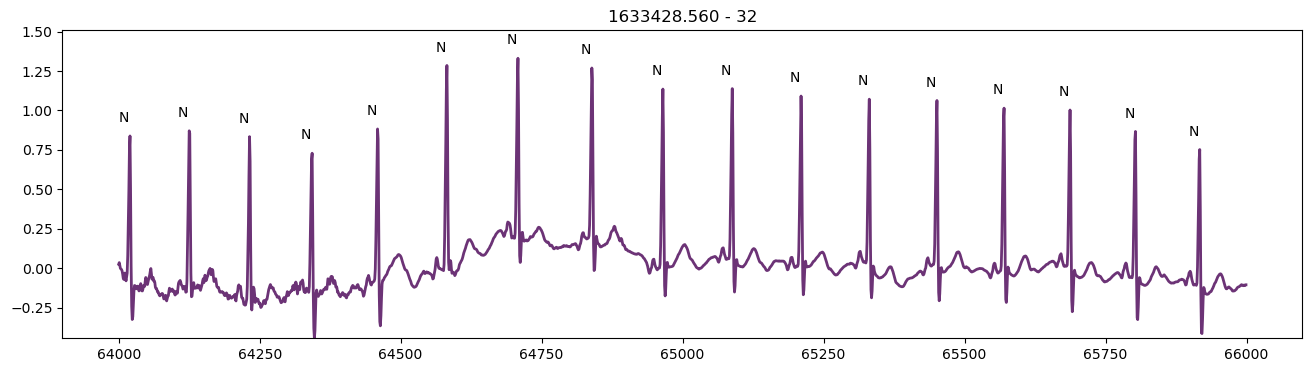

frag_nr = 33 66000 68000


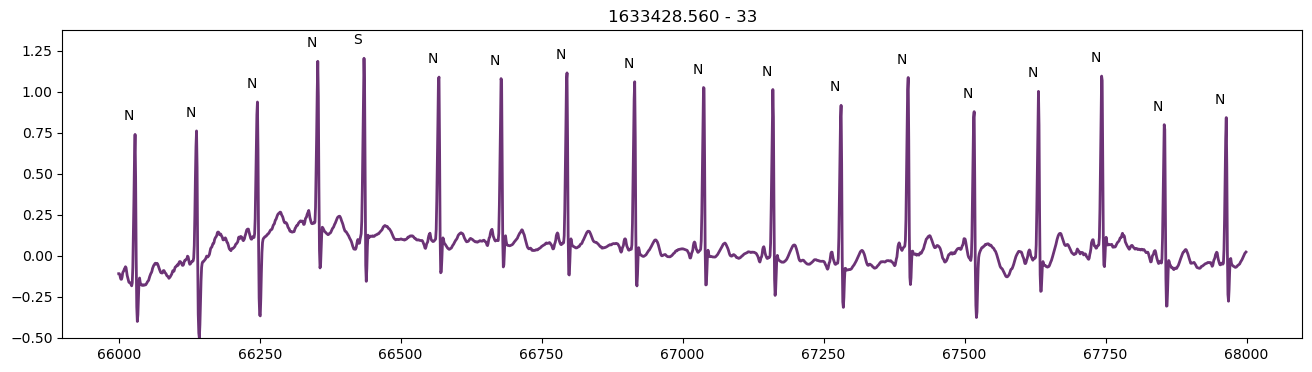

frag_nr = 34 68000 70000


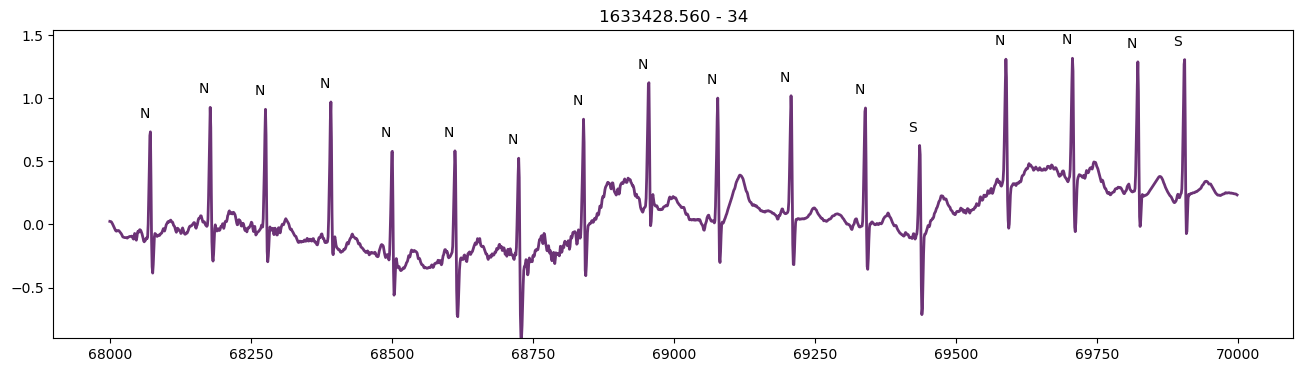

frag_nr = 35 70000 72000


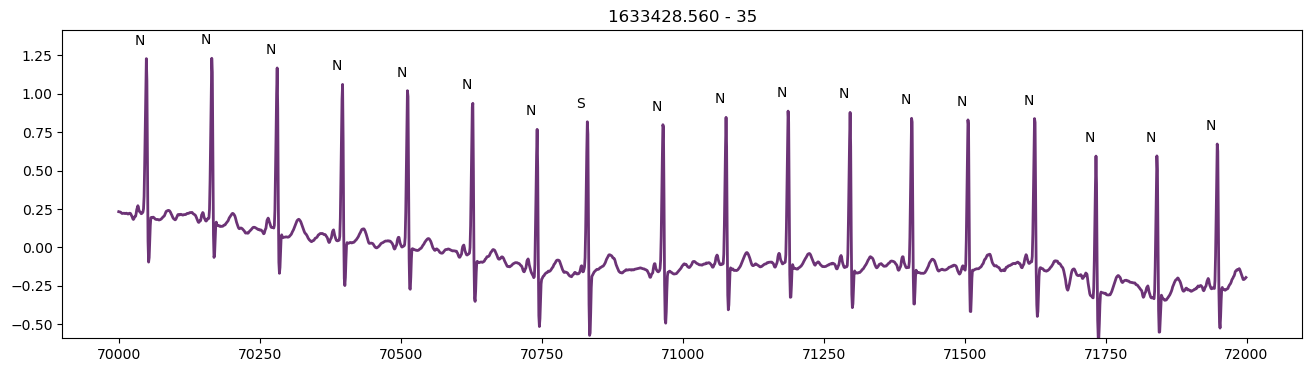

frag_nr = 36 72000 74000


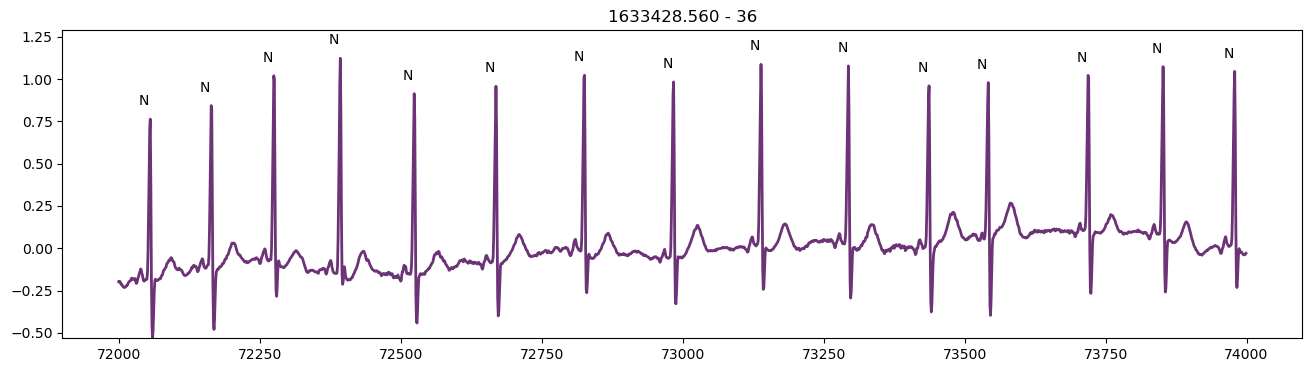

frag_nr = 37 74000 76000


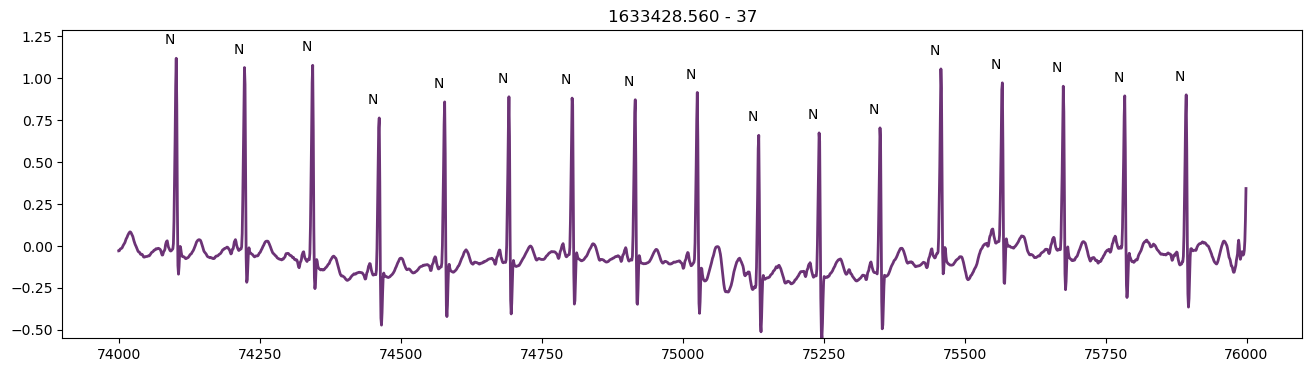

frag_nr = 38 76000 78000


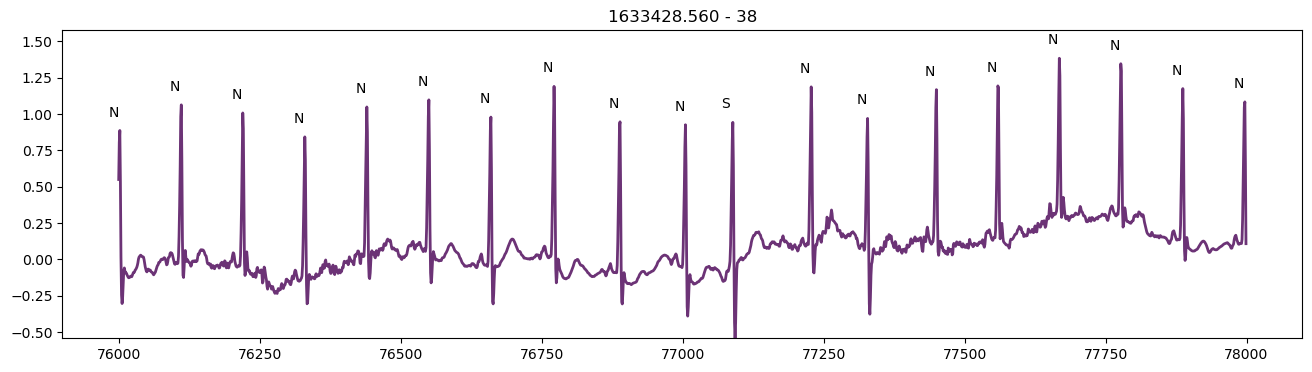

frag_nr = 39 78000 80000


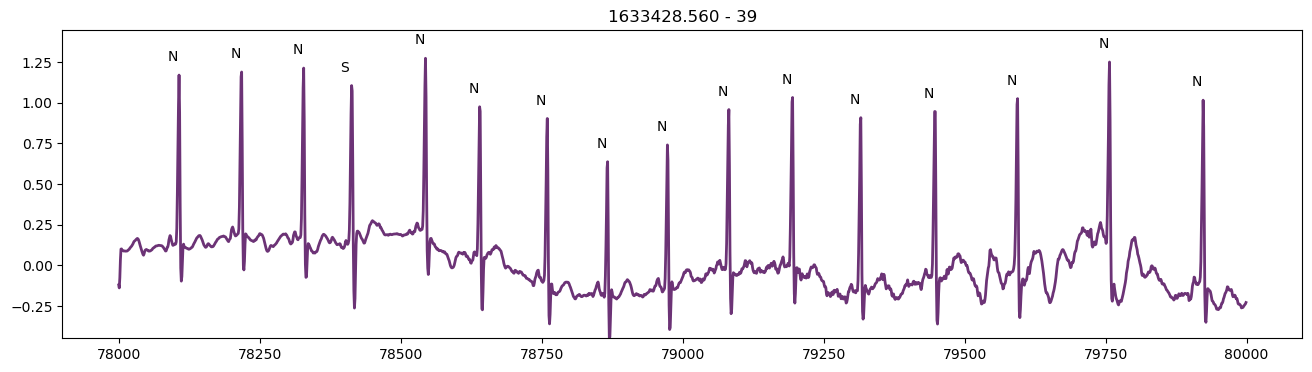

frag_nr = 40 80000 82000


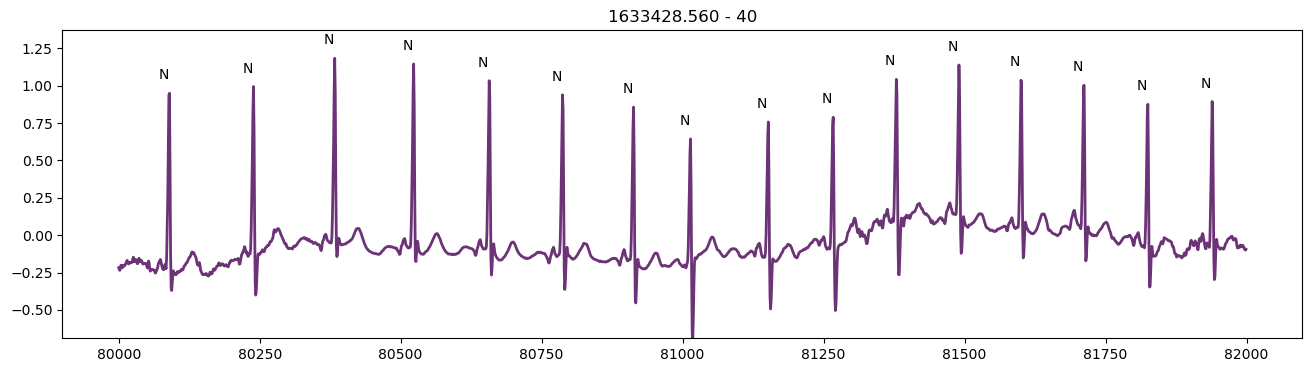

frag_nr = 41 82000 84000


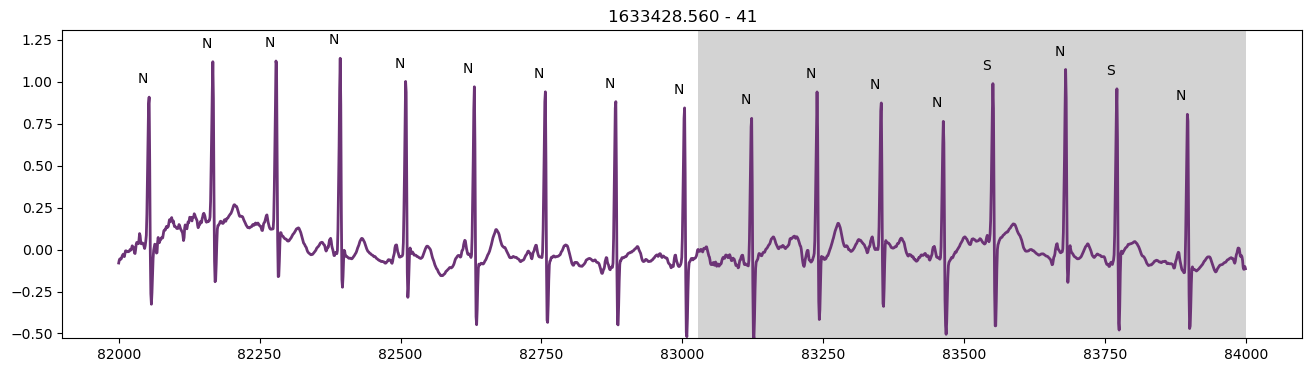

frag_nr = 42 84000 86000


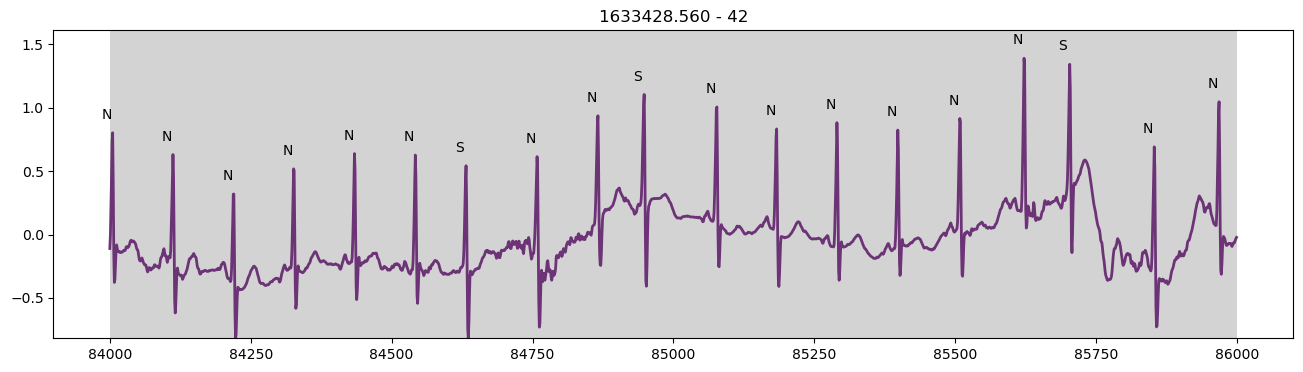

frag_nr = 43 86000 88000


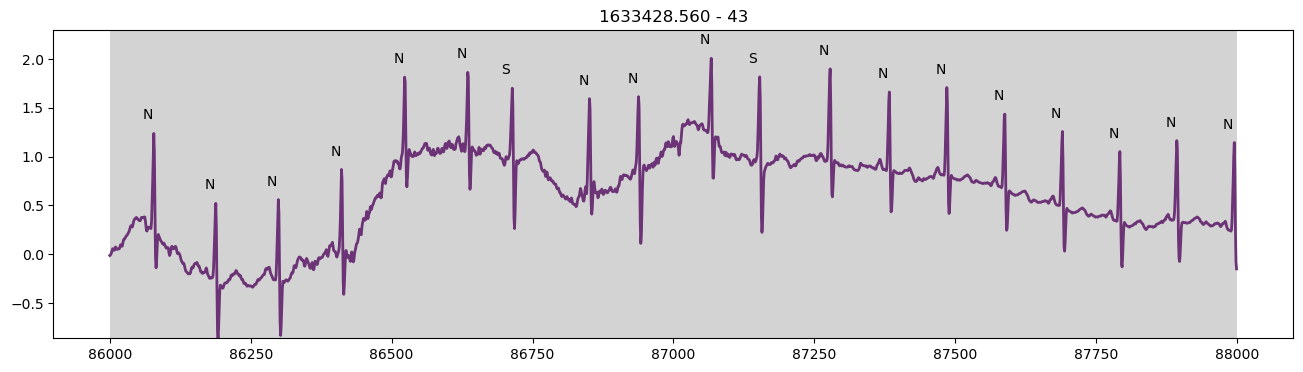

frag_nr = 44 88000 90000


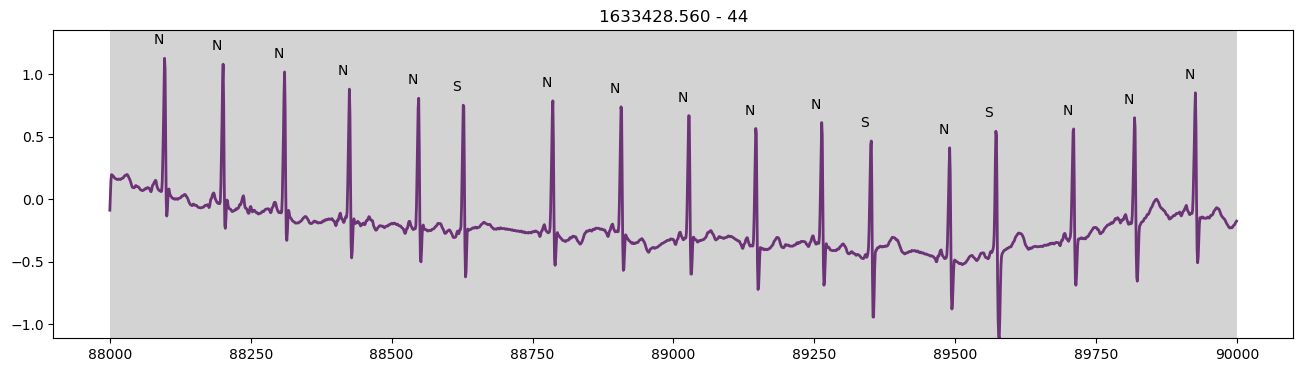

frag_nr = 45 90000 92000


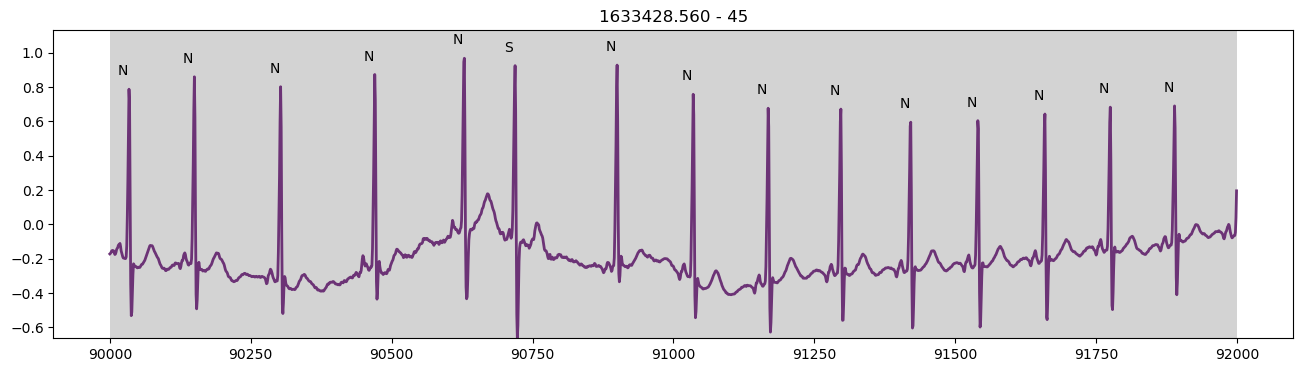

frag_nr = 46 92000 94000


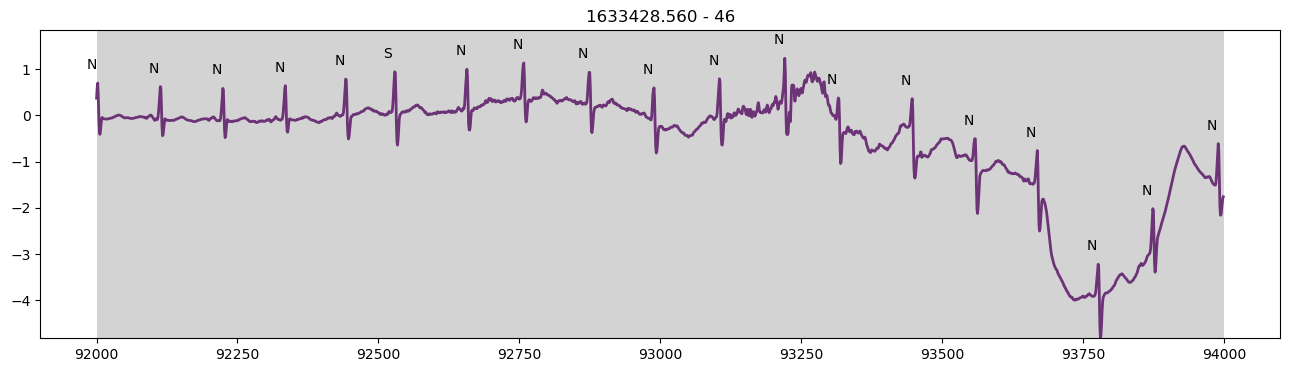

frag_nr = 47 94000 96000


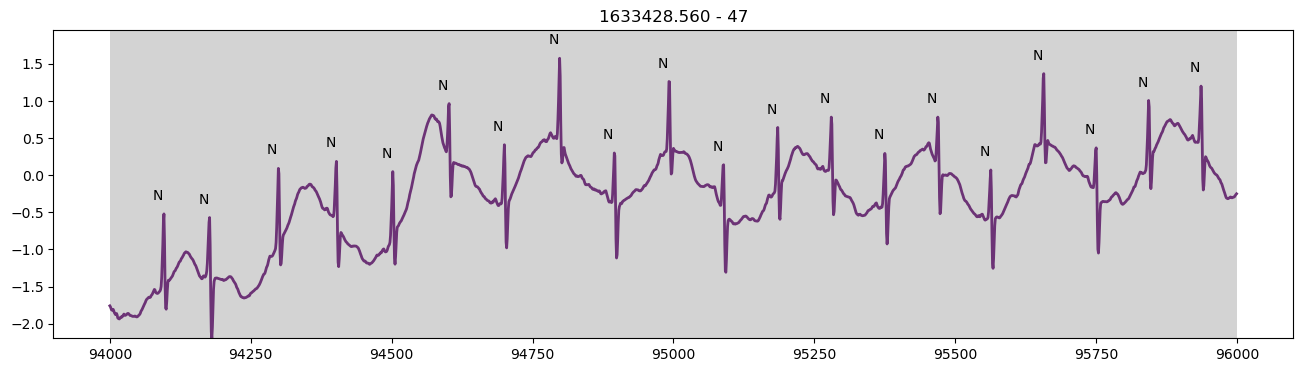

frag_nr = 48 96000 98000


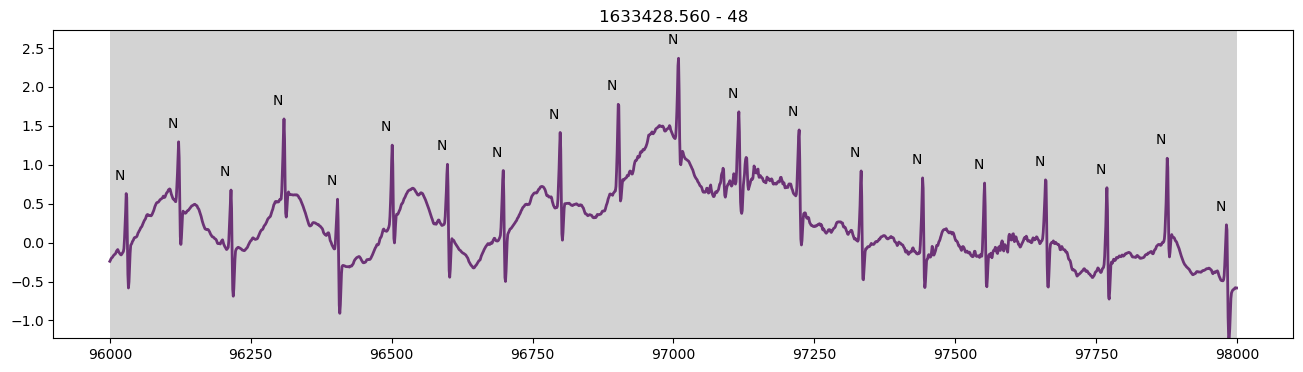

frag_nr = 49 98000 100000


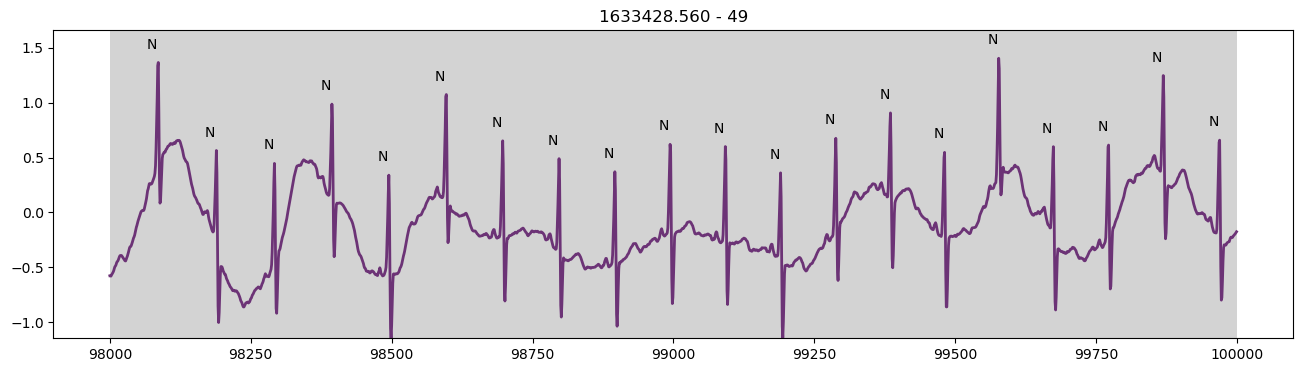

frag_nr = 50 100000 102000


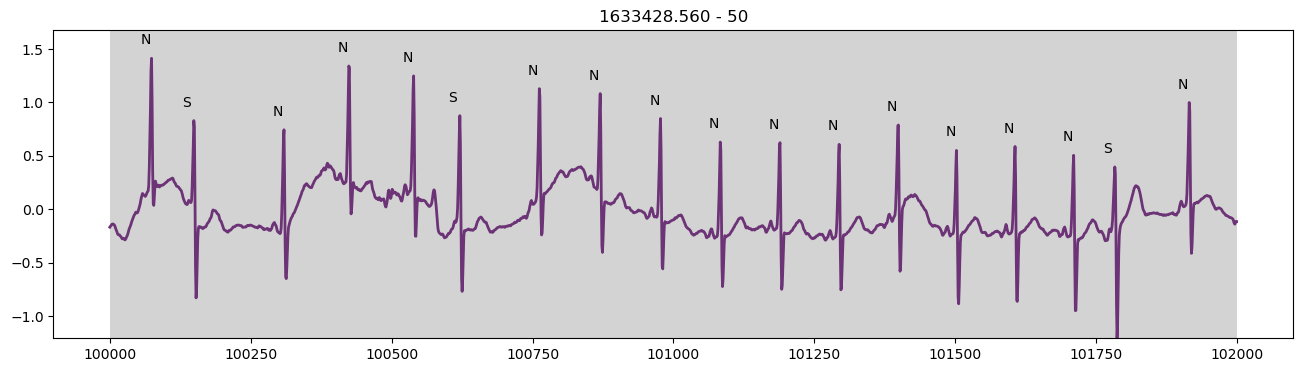

frag_nr = 51 102000 104000


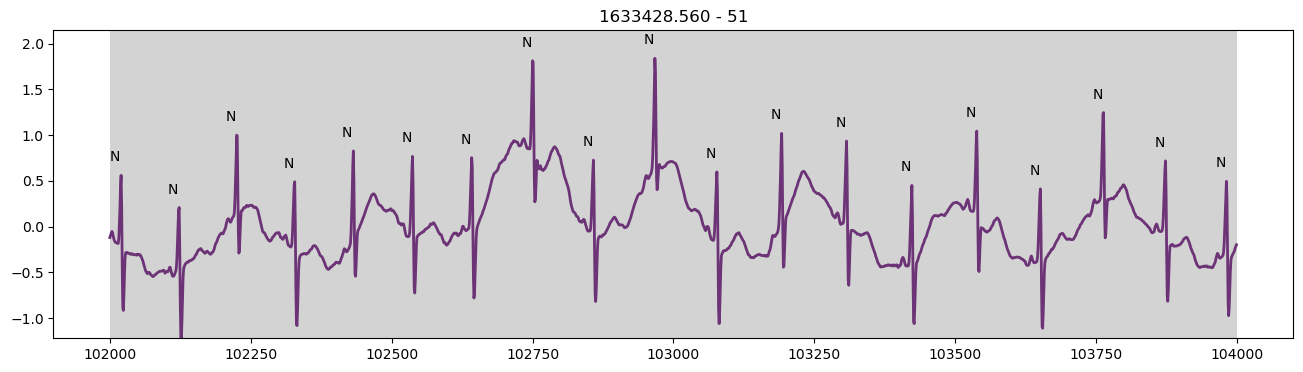

frag_nr = 52 104000 106000


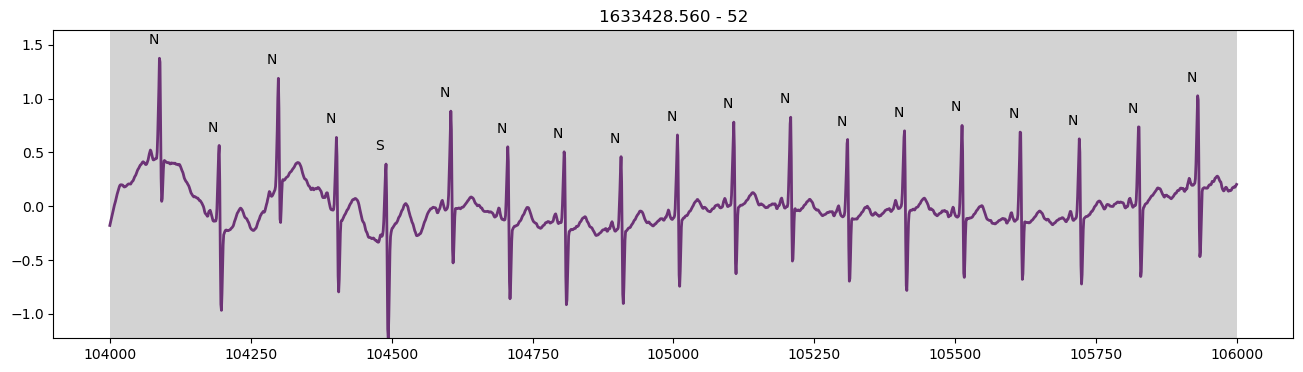

frag_nr = 53 106000 108000


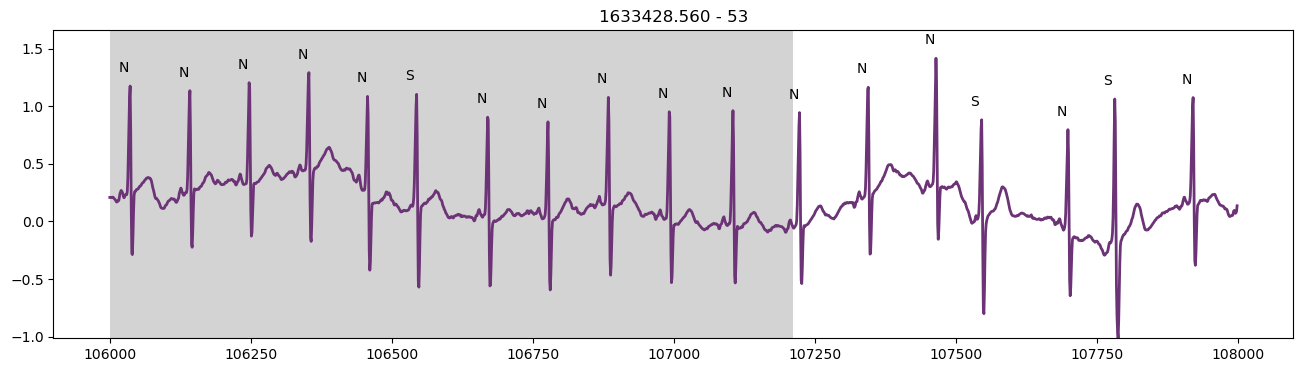

frag_nr = 54 108000 110000


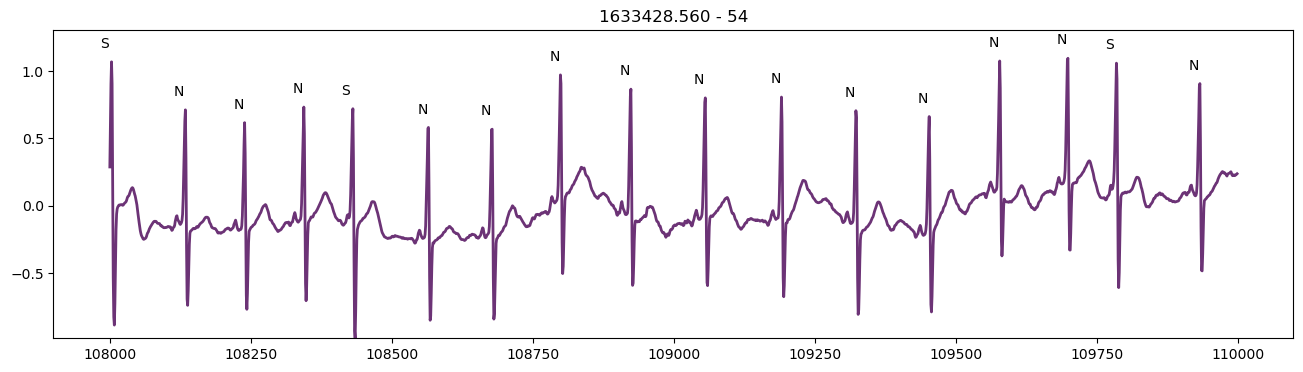

frag_nr = 55 110000 112000


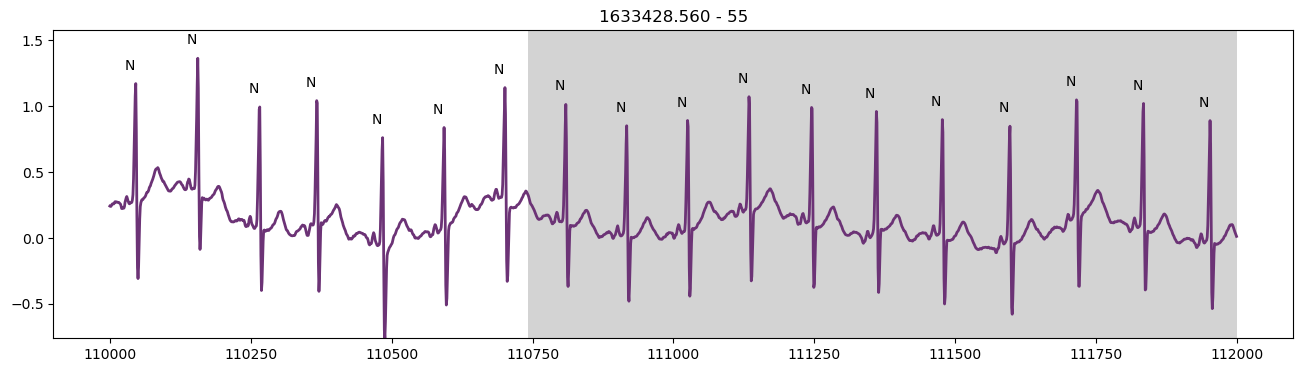

frag_nr = 56 112000 114000


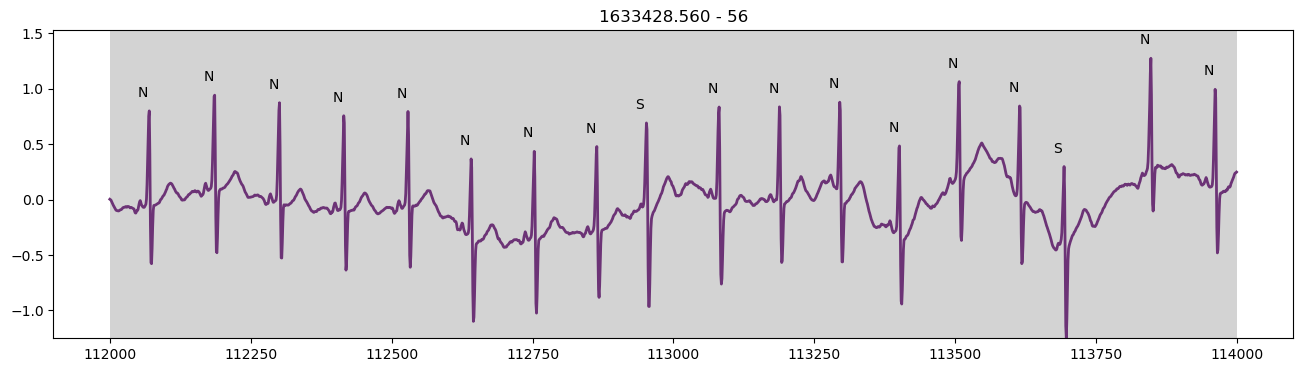

frag_nr = 57 114000 116000


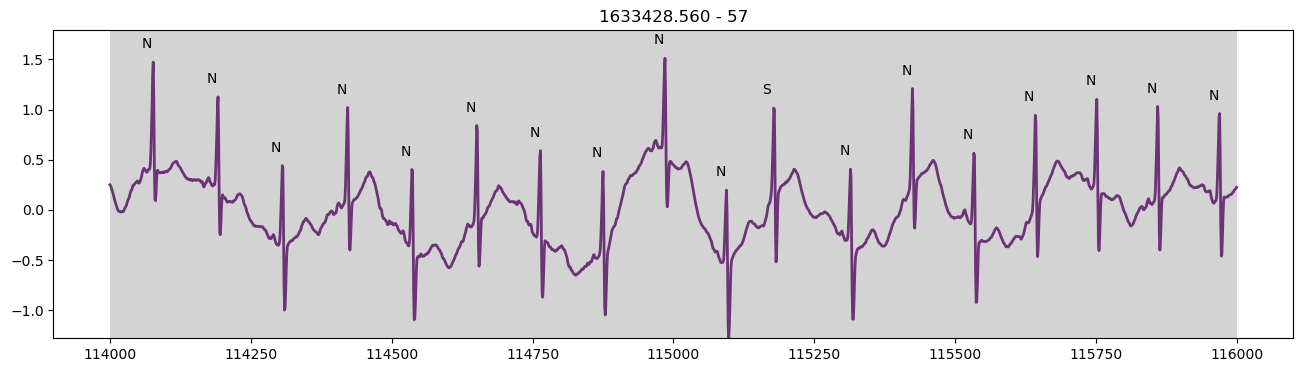

frag_nr = 58 116000 118000


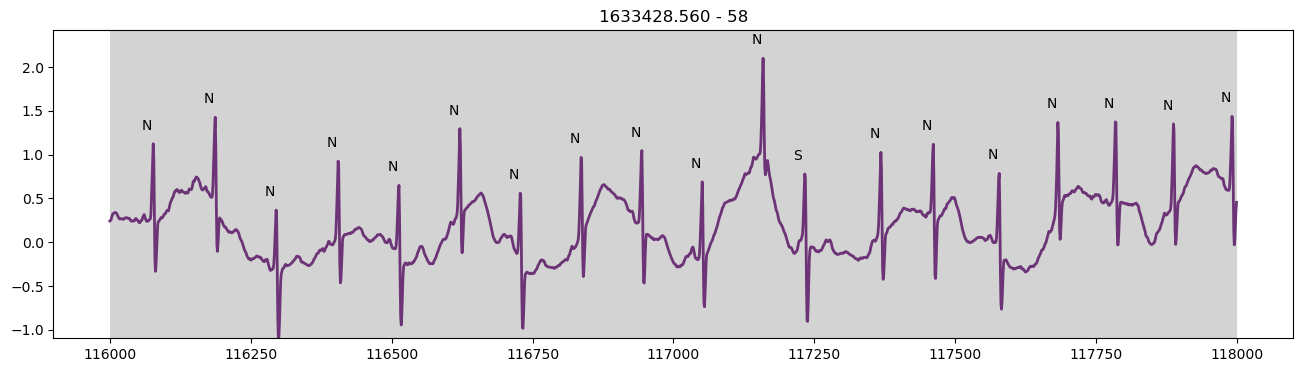

frag_nr = 59 118000 120000


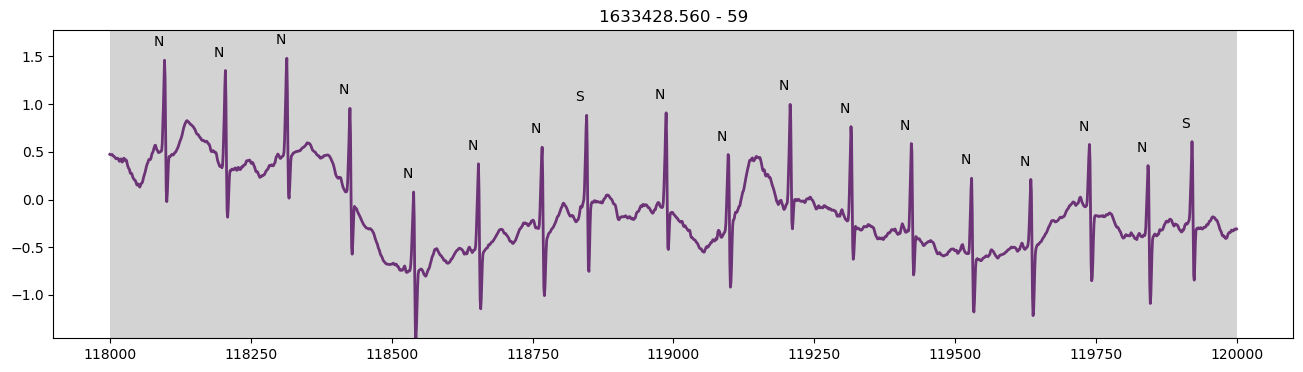

frag_nr = 60 120000 122000


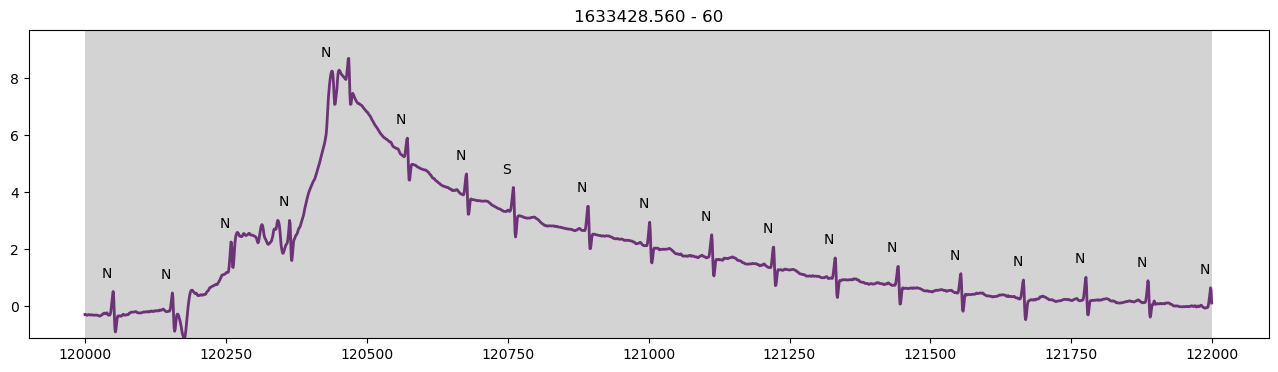

frag_nr = 61 122000 124000


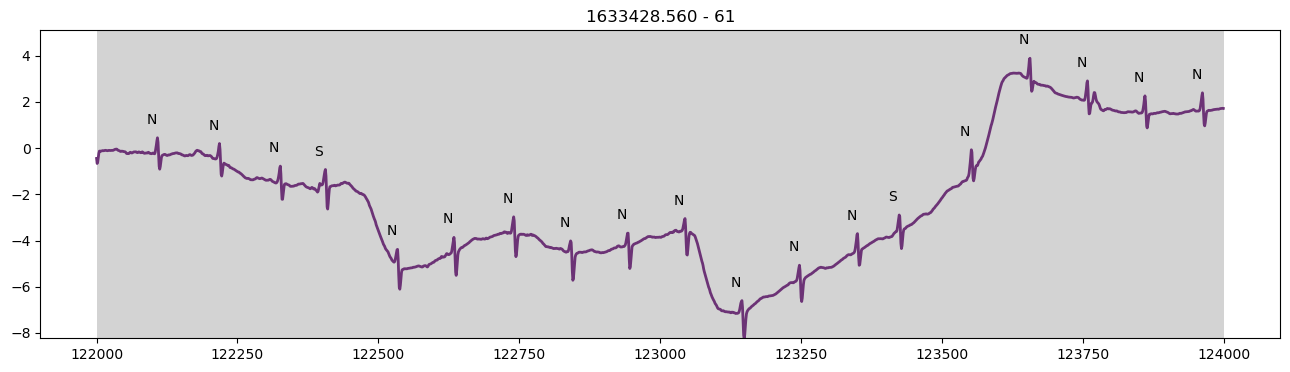

frag_nr = 62 124000 126000


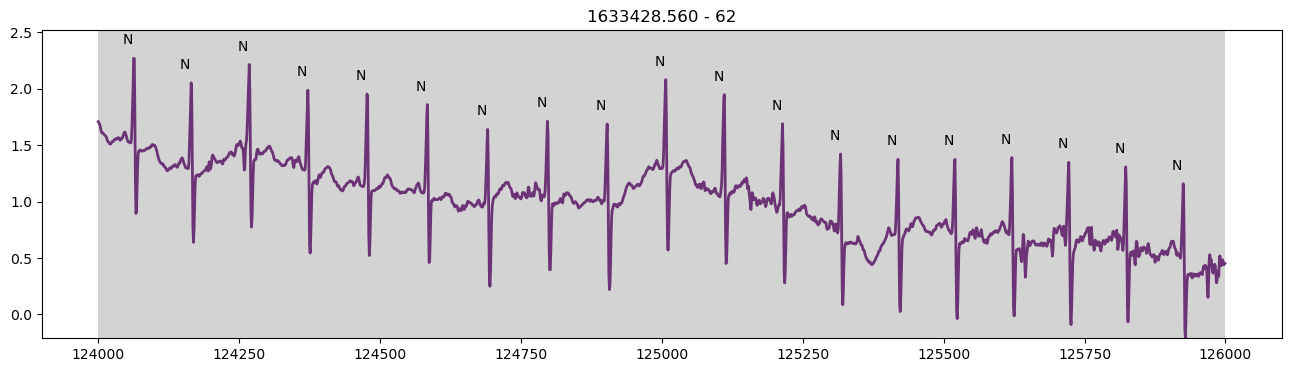

In [1]:
# Scriptas ZIVE EKG grafiniam atvaizdavimui su matplotlib

import numpy as np
import neurokit2 as nk
from neurokit2 import signal_filter

import pandas as pd
import sys
import matplotlib.pyplot as plt
import json
from pathlib import Path

from vertinimas_util import zive_read_file_1ch, get_symbol_list
from vertinimas_util import zive_read_df_rpeaks, zive_read_df_data

def get_df_noises_frag(df_noises_orig, start, end):
# Koreguojame df_noises
    df_noises = df_noises_orig.copy()
    if (df_noises_orig.empty != True):
        df_noises.drop(df_noises[(df_noises['startIndex'] < start) & (df_noises['endIndex'] <= start)].index, inplace=True)
        df_noises.drop(df_noises[(df_noises['startIndex'] >= end) & (df_noises['endIndex'] > end)].index, inplace=True)
        if (df_noises.empty != True):
            for idx, row in df_noises.iterrows():
                if ((start > row['startIndex']) & (start <= row['endIndex'])):
                    row['startIndex'] = start
                if ((end < row['endIndex']) & (end >= row['startIndex'])):
                    row['endIndex'] = end    
    return df_noises    


def anotacijos(df, symbol):
    df_anot = df.loc[df['annotationValue'] == symbol]
    keys_anot = df_anot['sampleIndex'].values.tolist()
    values_anot = df_anot['annotationValue'].values.tolist()
    lst_anot = {keys_anot[i]: values_anot[i] for i in range(len(keys_anot))}
    return lst_anot

def show_seq_zive_noise_pred(signal, atr_sample, atr_symbol, atr_symbol_pred, df_noises_orig, frag_start, frag_end, win_ls, win_rs, win_flag=False):

# win_ls - klasifikuojamo EKG segmento plotis iki R pūpsnio (iš kairės) 
# win_rs - klasifikuojamo EKG segmento plotis nuo R pūpsnio (iš dešinės)

    # Išskiriame fragmentą
    fragment = signal[frag_start:frag_end]
    # gražiname seką 2d: sequence.shape(seq_end-seq_start, 1)

    # suformuojame anotacijų žymes, beat_locs - indeksas sekoje 
    beat_symbols, beat_locs = get_symbol_list(atr_symbol,atr_sample, frag_start, frag_end)
    df_noises_frag = get_df_noises_frag(df_noises_orig, frag_start, frag_end)
    if (atr_symbol_pred):
        pred_symbols, pred_locs = get_symbol_list(atr_symbol_pred, atr_sample, frag_start, frag_end)
    else:
        pred_symbols = []

    # deltax ir deltay simbolių pozicijų koregavimui
    min = np.amin(fragment)
    max = np.amax(fragment)
    deltay = (max - min)/20
    deltax1 = len(fragment)/100

    # suformuojame vaizdą
    ax = plt.gca()

    # Įrašo fragmento vaizdas
    # x = np.arange(0, len(fragment), 1)
    x = np.arange(frag_start, frag_end, 1)
    ax.plot(x, fragment, color="#6c3376", linewidth=2)
    left, right = ax.get_xlim()
    for i in range(len(beat_locs)):
        # Anotacijos
        ax.annotate(beat_symbols[i],xy=(beat_locs[i]+frag_start-deltax1,fragment[beat_locs[i]]+deltay))
        # Automatinės anotacijos
        if (pred_symbols):
            if (beat_symbols[i] != pred_symbols[i]):
                ax.annotate(pred_symbols[i],xy=(beat_locs[i]+frag_start-deltax1,fragment[beat_locs[i]]+deltay), xycoords='data',
    bbox=dict(boxstyle="circle, pad=0.4", fc="none", ec="red"), xytext=(20, 5), textcoords='offset points', ha='center')

    # parodomos triukšmo vietos
    if (df_noises_frag.empty != True):
        for idx, row in df_noises_frag.iterrows():
            ax.axvspan(row['startIndex'], row['endIndex'], facecolor='lightgray')
    
    # Sekų rėžiai
    if win_flag:
        left_mark = beat_locs[i] + frag_start - win_ls
        right_mark = beat_locs[i] + frag_start + win_rs
        centr_mark = beat_locs[i] + frag_start
        ax.axvline(x = left_mark, color = 'b', linestyle = 'dotted')
        ax.axvline(x = right_mark, color = 'b', linestyle = 'dotted')
        ax.axvline(x = centr_mark, color = 'b', linestyle = 'dotted')

    ax.set_ylim([min, max+2*deltay])

    return(ax)

    
# //////////////// NURODOMI PARAMETRAI /////////////////////////////////////////////////////

my_os=sys.platform
print("OS in my system : ",my_os)

if my_os != 'linux':
    OS = 'Windows'
else:  
    OS = 'Ubuntu'

# Bendras duomenų aplankas, kuriame patalpintas subfolderis name_db

if OS == 'Windows':
    Duomenu_aplankas = 'D:\\DI'   # variantas: Windows
    # Duomenu_aplankas = 'F:\DI\Data\MIT&ZIVE\VU'   # variantas: Herkulis
else:
    Duomenu_aplankas = '/home/kesju/DI'   # arba variantas: UBUNTU, be Docker

# jei variantas Docker pasirenkame:
# Duomenu_aplankas = '/Data/MIT&ZIVE'

# Vietinės talpyklos aplankas ir pūpsnių atributų failas
db_folder = 'DUOM_2022_RUDUO_2'

# Failai pūpsnių klasių formavimui
selected_beats = {'N':0, 'S':1, 'V':2}
all_beats =  {'N':0, 'S':1, 'V':2, 'U':3}  

# Diskretizavimo dažnis:
fs = 200

#  Nuoroda į aplanką su MIT2ZIVE duomenų rinkiniu
db_path = Path(Duomenu_aplankas, db_folder)

# Nuoroda į aplanką su EKG įrašais (.npy) ir anotacijomis (.json)
rec_dir = Path(db_path, 'records_selected')


# Vaizdo parametrai
window_left_side = 100
window_right_side = 100
frag_start_fixed = 0
# frag_end_fixed = 4000
frag_end_fixed = None
frag_window = 2000
win_flag= False


# Automatinės anotacijos failų (.json) aplankas
pred_folder = 'pred_100_100_nbal_win'

# Nuoroda į automatinės anotacijos failų (.json) aplanką
cnf_path = Path(Duomenu_aplankas,'ZIVE_BUFFER',pred_folder)

# ////////////////////////////////////////////////////////////////////////////

print("\nDuomenų rinkinys: ", db_path)
# print("Automatinės anotacijos failai (.json): ", cnf_path)
print("Vaizduojamas fragmentas:", frag_start_fixed, frag_end_fixed)

# NURODOME PACIENTŲ SĄRAŠĄ
# VARIANTAS, KAI UŽDUODAMI FAILŲ VARDAI IR SKAITOMI ORIGINALUS ZIVE FAILAI 
FileNames = [
1626934.963,
1626931.201,
1630715.664,
1630714.569,
1630729.576,
1630735.143,
1630693.635,
1630734.526,
1630718.396,
1630721.49,
1631139.883,
1631083.411,
1631039.923,
1631029.786,
1632342.032,
1633428.56,
1633584.898,
1633405.853,
1634112.089,
1636451.86
]

FileNames = [1633428.56] #  

# mark1

# # Atsisiunčiame EKG įrašų sąrašą
# flag_incl = False
# recordingId_list = get_recordingId_list(db_path, flag_incl)
# # Jei flag_incl == False, į požymį incl nereaguoja, sąrašą išveda visiems EKG įrašams.
# Jei flag_incl == True, sąrašą išveda tik tiems įrašams, kuriems incl ==1

file_names=["%.3f" % i for i in FileNames]
print(file_names)

file_name = file_names[0]
print(f"\nZive įrašas:  {file_name:>2}")

# Nuskaitome visą paciento įrašą 'raw'
file_path = Path(rec_dir, file_name)
sign_raw = zive_read_file_1ch(file_path)  
signal_length = sign_raw.shape[0]
print('signal_length= ', signal_length, sign_raw.shape)

if (frag_end_fixed == None or frag_end_fixed > signal_length):
    frag_end_fixed = signal_length

frag_number = int((frag_end_fixed-frag_start_fixed)/frag_window)
if frag_number == 0:
    frag_number =1
    frag_window = signal_length-frag_start_fixed

print("Lango plotis: ", frag_window, "Langų: ", frag_number)

# Išlyginame izoliniją
# sign_filt = signal_filter(signal=sign_raw, sampling_rate=200, lowcut=0.5, method="butterworth", order=5)
# print("\nIšlyginta izolinija su butterworth, order=5, lowcut=0.5")

sign_filt = sign_raw

# Nuskaitome anotacijas ir jų indeksus

df_rpeaks = zive_read_df_rpeaks(rec_dir, file_name)
atr_sample = df_rpeaks['sampleIndex'].to_numpy()
atr_symbol = df_rpeaks['annotationValue'].to_numpy()

# Anotacijų skaičius įraše
lst = {}
for idx,name in enumerate(df_rpeaks['annotationValue'].value_counts().index.tolist()):
    counts = df_rpeaks['annotationValue'].value_counts()[idx]
    lst[name] = counts
print("\nAnotacijų įraše (F ir U ignoruojamos):")
print(lst)

# Galime pažiūrėti, kur yra anotacijos
print("\ndf_rpeaks:")
# print(df_rpeaks.head(20))
print("\nRankinės anotacijos S:", anotacijos(df_rpeaks,"S"))
print("\nRankinės anotacijos V:", anotacijos(df_rpeaks,"V"))

# Nuskaitome triukšmų intervalų reikšmes
df_noises = zive_read_df_data(rec_dir, file_name, 'noises')
if (df_noises.empty == True):
    print(f'noises list for {file_name} is empty!')
else:
    print(f'\nTriukšmų intervalų kiekis: {len(df_noises)}')

# Nuskaitome automatines anotacijas ir jų indeksus
atr_symbol_pred = []
# error_flag = False
# filepath = Path(cnf_path, recordingId + '_pred' + '.json')
# df_rpred = zive_read_df_data(filepath, 'rpred')
# if (df_rpred.empty == True):
#     print(f'Annotation file for {recordingId} does not exist or rpred is empty!')
#     error_flag = True
# else:
#     atr_sample_pred = df_rpred['sampleIndex'].to_numpy()
#     atr_symbol_pred = df_rpred['annotationValue'].to_numpy()

# if error_flag:
#     sys.exit()

# # Anotacijų skaičius įraše
# lst = {}
# for idx,name in enumerate(df_rpred['annotationValue'].value_counts().index.tolist()):
#     counts = df_rpred['annotationValue'].value_counts()[idx]
#     lst[name] = counts
# print("\nAnotacijų įraše (F ir U ignoruojamos):")
# print(lst)

# Galime pažiūrėti, kur yra anotacijos
# print("\nAnotacijų S vietos:", anotaciju_vietos(df,"S"))
# print("\nAutomatinės anotacijos S:",anotacijos(df_rpred,"S"))
# print("\nAutomatinės anotacijos V:",anotacijos(df_rpred,"V"))

frag_start = frag_start_fixed
frag_end = frag_start + frag_window
if (frag_end > frag_end_fixed):
    frag_end = frag_end_fixed

for frag_nr in range(frag_number):
    # 'Išpjauname' seką ir atvaizduojame
    print('frag_nr =', frag_nr, frag_start, frag_end)
    fig = plt.figure(figsize=(16,4),facecolor=(1, 1, 1))
    ax = show_seq_zive_noise_pred(sign_filt, atr_sample, atr_symbol, atr_symbol_pred, df_noises, frag_start, frag_end, window_left_side, window_right_side, win_flag)
    ax.set_title(file_name + ' - ' + str(frag_nr))
    # plt.savefig(file_path, bbox_inches='tight', pad_inches = 0.2)
    plt.show()

    frag_start += frag_window
    frag_end += frag_window
    if (frag_end > signal_length):
        frag_end = signal_length
